# Human Cell Lines

In [1]:
# import mazebox as mb
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import dropkick as dk
# make sure to use position 1
sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb
import cellrank as cr
import scanorama

In [2]:
adata = cr.read('../../out/cell-lines/adata_no_doublets_02.h5ad')


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.read` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


In [3]:
adata

AnnData object with n_obs × n_vars = 13945 × 20446
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'cline', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_scores_ind', 'predicted_doublets_ind', 'M', 'E', 'clusters_gradients', 'cell_cycle_diff', 'score'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-CORL279', 'dropkick_coef-DMS454', 'dropkick_coef-DMS53', 'dropkick_coef-H1048', 'dropkick_coef-H524', 'dropkick_coef-H69', 'dropkick_coef-H82', 'dropkick_coef-H841', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_

In [4]:
X_magic = cr.read('../../out/cell-lines/X_magic_no_doublets_02.h5ad')
X_magic

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.read` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


AnnData object with n_obs × n_vars = 13945 × 20446
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'cline', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_scores_ind', 'predicted_doublets_ind', 'M', 'E', 'clusters_gradients', 'cell_cycle_diff'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-CORL279', 'dropkick_coef-DMS454', 'dropkick_coef-DMS53', 'dropkick_coef-H1048', 'dropkick_coef-H524', 'dropkick_coef-H69', 'dropkick_coef-H82', 'dropkick_coef-H841', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_cou

In [5]:
adata.layers['imputed'] = X_magic.X
adata.obsm['X_pca_imputed'] = X_magic.obsm['X_pca']

In [6]:
adata.write_h5ad('../../out/cell-lines/adata_03.h5ad')

# Subtyping with Archetype Signatures

In [2]:
adata = cr.read('../../out/cell-lines/adata_03.h5ad')

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.read` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


## Using Mazebox to generate archetype scores

In [3]:
sig_matrix = pd.read_csv('../../out/bulk/sig_matrix_ParTI_2021.csv', header =0, index_col = 0)

sig_matrix = sig_matrix / np.linalg.norm(sig_matrix, axis=0)


In [4]:
# import seaborn as sns
# max_subtype = []
# max_v = []
# sig_matrix_copy = sig_matrix.copy()
# for i,r in sig_matrix.iterrows():
#     maxi = r.idxmax()
#     maxv = r.max()
#     max_subtype.append(maxi) 
#     max_v.append(maxv)
# sig_matrix_copy['max_subtype'] = max_subtype
# sig_matrix_copy['max'] = max_v

# plt.figure(figsize=(5,30))
# sig_matrix_copy = sig_matrix_copy.sort_values(by = ['max_subtype','max'], ascending=[True, False])
# sig_matrix_copy = sig_matrix_copy[['SCLC-A','SCLC-A2','SCLC-N','SCLC-P','SCLC-Y']]
# sns.heatmap(sig_matrix_copy, cmap='viridis', yticklabels = True)
# plt.xticks(rotation = 90)
# plt.title(f'Log-transformed Archetype Expression Profiles')
# plt.tight_layout()
# # plt.savefig(op.join(outdir,f'figures/Archetypes/sig_matrix_logfc.pdf'))
# plt.show()
# plt.close()

# sig_matrix_copy.to_csv('../data/sig_matrix_ParTI.csv')

If the below code gives an error about data shape, use `type = 'csr'`.

Cells with zero expression for all genes in gene signature will get scores of NaN when assigning scores in adata.obs (because these cells are filtered for the calculation). 

Trying to set attribute `.obs` of view, copying.


Transforming tumor data...
Gene signature matrix now has shape:  (99, 5)
Tumor data shortened to genes in gene list...
(13883, 99)
Tumor data subsetting complete.


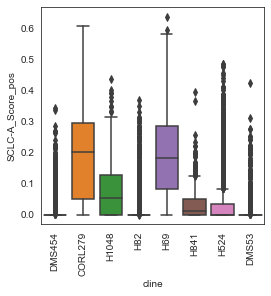

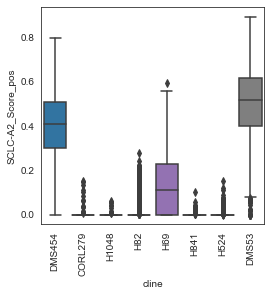

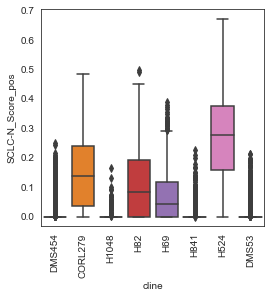

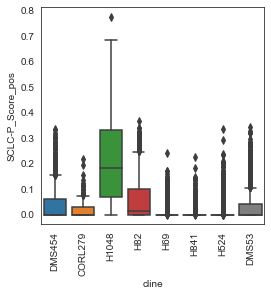

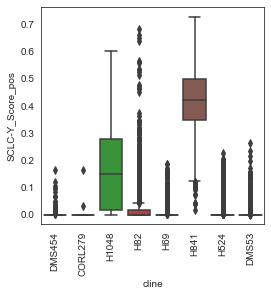

In [5]:
adata, adata_small, sig_matrix2 = mb.ar.phenotyping_recipe(adata, sig_matrix, groupby = 'cline',velocity=False)


In [6]:
from sklearn.manifold import LocallyLinearEmbedding
def _archetype_diagram_no_arrows(_adata, score_name, color, figsize, order, multiplier,fname,
                                 sizes = None, alpha = .3, s = 30, color_dict = None, norm = 'scale'):
    # X = subtype scores for each subtype (pd dataframe)
    n_samples = len(_adata.obs_names)

    n_types = len(sig_matrix.columns)
    subtypes = sig_matrix.columns
    X = _adata.obs[[f"{x}{score_name}" for x in subtypes]]
    top = X.sum().sort_values(ascending=False)[:3]  # return a list of n largest element
    print(top.index)

    # normalize X to sum to 1 (makes sure that the data fits within the archetype diagram with I matrix = vertices
    X_norm = pd.DataFrame(columns=X.columns)
    if norm == 'scale':
        for i, r in X.iterrows():
            if r.sum() == 0:
                X_norm = X_norm.append(r)
            else:
                X_norm = X_norm.append(r / r.sum())
    elif norm == 'max':
        max = X.max().max()
        X_norm = X / max
    elif norm == 'None':
        X_norm = X

    X = X_norm.fillna(0)
    if type(order) != type(None):
        X = X[[f"{x}{score_name}" for x in order]]
        subtypes = order
    else:
        order = subtypes

    ident = np.identity(n_types)
    for i, x in enumerate(subtypes):
        X = X.append(pd.DataFrame(np.array(ident[i]), index=X.columns, columns=[x]).T)

    embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=4, method='modified', eigen_solver='dense')
    X_transformed = embedding.fit_transform(X[-n_types:])
    X_transformed = X_transformed.T

    X_df_data = embedding.transform(X[:-n_types])
    X_df_data = X_df_data.T

    fig = plt.figure(figsize=figsize)

    ax = fig.add_subplot()
    colors = _adata.obs[color].values
    if type(colors[0]) == str:
        c = [color_dict[i] for i in colors]
    else:
        c = colors
    plt.scatter(X_df_data[0], X_df_data[1], c=c, zorder=1, alpha=alpha, s=s)
    if type(sizes) == int:
        plt.scatter(X_transformed[0, -n_types:], X_transformed[1, -n_types:], c='black',
                    zorder=2, s=sizes)
    else:
        sizes = [Counter(colors)[i] * multiplier / n_samples for i in order]
        print(sizes)
        plt.scatter(X_transformed[0, -n_types:], X_transformed[1, -n_types:], c='black',
                zorder=2, s=sizes)
    plt.axis('tight')
    plt.savefig(f'./figures/{fname}.pdf')
    plt.show()
    plt.close()
    fig = plt.figure(figsize=figsize)

    ax = fig.add_subplot()
    colors = _adata.obs[color].values
    if type(colors[0]) == str:
        c = [color_dict[i] for i in colors]
    else:
        c = colors
    sns.kdeplot(X_df_data[0], X_df_data[1], cmap="Reds", shade=True, bw=.15)
    if type(sizes) == int:
        plt.scatter(X_transformed[0, -n_types:], X_transformed[1, -n_types:], c='black',
                    zorder=2, s=sizes)
    else:
        sizes = [Counter(colors)[i] * multiplier / n_samples for i in order]
        print(sizes)
        plt.scatter(X_transformed[0, -n_types:], X_transformed[1, -n_types:], c='black',
                    zorder=2, s=sizes)
    plt.axis('tight')
    plt.show()
    plt.close()


Index(['SCLC-A2_Score', 'SCLC-N_Score', 'SCLC-Y_Score'], dtype='object')


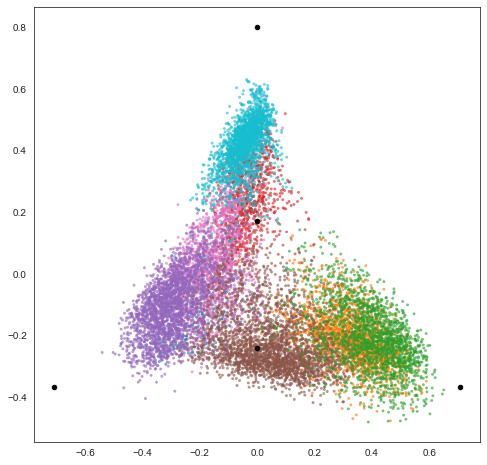

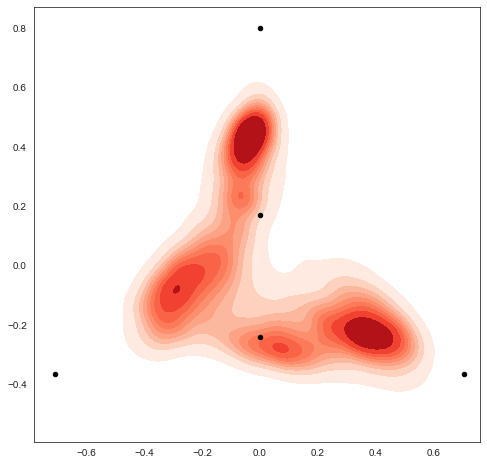

In [8]:
color_dict = {}
for i,c in enumerate(sorted(list(set(adata_small.obs['cline'])))):
    if i == 7:     color_dict[c] = sns.color_palette('tab10')[9] #skip grey
    else:
        color_dict[c] = sns.color_palette('tab10',8)[i]
cmap = 'jet'
_archetype_diagram_no_arrows(adata_small, color_dict=color_dict,color='cline',fname = 'cline_archetype_space',
                        order = ['SCLC-Y','SCLC-A','SCLC-P','SCLC-N','SCLC-A2'], norm = 'None',
                        multiplier=1, figsize=(8,8), score_name = '_Score', alpha = .5, s = 4, sizes = 20)


## Newer phenotype classification with labeled generalists
Let's check to see how many samples have significant scores (p>.3) for more than one phenotype.

<BarContainer object of 3 artists>

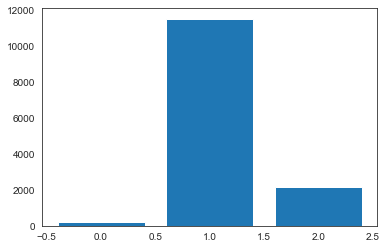

In [9]:
df = adata.obs[[f"{x}_Score_pos" for x in ['SCLC-N', 'SCLC-A', 'SCLC-P', 'SCLC-Y', 'SCLC-A2']]]
# np.unique((df > .3).sum(axis = 1), return_counts=True)[1]
plt.bar(height = np.unique(((df.T/df.sum(axis = 1)).T > .33).sum(axis = 1), return_counts=True)[1], x = range(3), log=False)

In [10]:
arc_pheno = []
arc_aa_type = []

for i,r in df.iterrows():
    r = r/r.sum()
    if (r > .33).sum() > 1:
        arc_aa_type.append('Generalist')
        arc_pheno.append(r.sort_values(ascending=False)[0:2].sort_index().index[0].split('_')[0]+"_"+r.sort_values(ascending=False)[0:2].sort_index().index[1].split('_')[0])
    elif  (r > .33).sum() == 1:
        try:
            arc_aa_type.append(r.idxmax().split('_')[0]+" Specialist")
            arc_pheno.append(r.idxmax().split('_')[0])
        except AttributeError: 
            arc_aa_type.append("Unclassified")
            arc_pheno.append("Unclassified")
    else: 
        arc_aa_type.append("Unclassified")
        arc_pheno.append("Unclassified")
adata.obs['arc_pheno'] = arc_pheno
adata.obs['arc_aa_type'] = arc_aa_type


In [12]:
pd.crosstab(adata.obs['arc_pheno'],adata.obs['cline']).style.background_gradient(cmap='viridis')

In [13]:
pd.crosstab( adata.obs['arc_pheno'],adata.obs['Phenotype']).style.background_gradient(cmap='viridis')

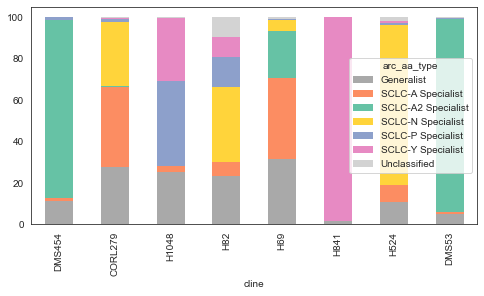

In [14]:
cp = ['#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3']
color_dict = {'SCLC-Y Specialist': cp[4], 'SCLC-A Specialist': cp[0], 'SCLC-A2 Specialist': cp[1], 'SCLC-N Specialist': cp[2], 'SCLC-P Specialist': cp[3],
              'Generalist': 'darkgrey', 'Unclassified': 'lightgrey'}
mb.pl.subtype_bar(adata,groupby='cline', fname = 'cline', pheno_name="arc_aa_type", custom_palette=color_dict)

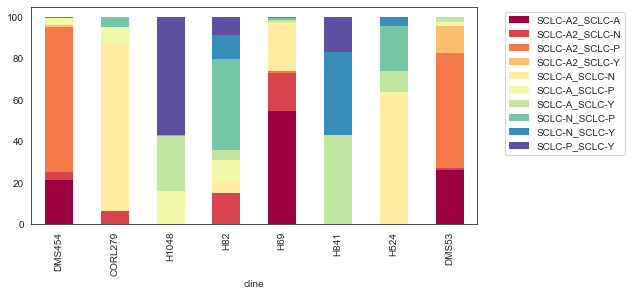

In [16]:
_adata = adata[adata.obs['arc_aa_type'] == 'Generalist']
plt.rcParams["figure.figsize"] = [8, 4]
((pd.crosstab(_adata.obs["cline"], _adata.obs['arc_pheno']).T /
  pd.crosstab(_adata.obs["cline"], _adata.obs['arc_pheno']).sum(axis=1)) * 100).T.plot(kind='bar',
                                                                                              stacked=True,
                                                                                              linewidth=0, cmap = 'Spectral')
plt.legend(bbox_to_anchor=(1.05, 1))

plt.savefig('./figures/arc_aa_generalist_subtypes.pdf')

In [18]:
# import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 300
# mb.pl.archetype_diagrams(adata, sig_matrix, color_dict=color_dict, groupby='cline',color = 'arc_aa_type',
#                         order = ['SCLC-Y','SCLC-A','SCLC-P','SCLC-N','SCLC-A2'], norm = 'None',sizes = 20,
#                         figsize=(4,4), score_name = '_Score', alpha = .8, s = 8, arrows = False)


In [19]:
np.unique(adata.obs['arc_pheno'], return_counts=True)

(array(['SCLC-A', 'SCLC-A2', 'SCLC-A2_SCLC-A', 'SCLC-A2_SCLC-N',
        'SCLC-A2_SCLC-P', 'SCLC-A2_SCLC-Y', 'SCLC-A_SCLC-N',
        'SCLC-A_SCLC-P', 'SCLC-A_SCLC-Y', 'SCLC-N', 'SCLC-N_SCLC-P',
        'SCLC-N_SCLC-Y', 'SCLC-P', 'SCLC-P_SCLC-Y', 'SCLC-Y',
        'Unclassified'], dtype=object),
 array([1580, 4086,  556,  239,  216,   14,  436,  103,  131, 2654,  242,
          73,  706,  174, 2499,  236]))

In [20]:
adata.write_h5ad('../../out/cell-lines/adata_03.h5ad')



... storing 'Phenotype' as categorical
... storing 'arc_pheno' as categorical
... storing 'arc_aa_type' as categorical


# ParetoTI S Matrix
1. ParetoTI: fit_pch gives an S matrix for each archetype. Take a look at these values. Maybe try a Gaussian model on these values?
2. We could also do a test where we see if each bulk archetype is enriched for S values for each archetype, and if significant, align the archetypes that way. 
3. Try doing a CAP plot for the S matrix and for the GMM-transformed S matrix


In [2]:
adata = sc.read_h5ad('../../out/cell-lines/adata_03.h5ad')


In [3]:
X_magic = sc.read_h5ad('../../out/cell-lines/X_magic_no_doublets_02.h5ad')

In [6]:
S_matrix = pd.read_csv('../../out/cell-lines/ParetoTI/S.csv', index_col=0)

In [7]:
S_matrix

V1        V2        V3  \
2637-SM-1-GCCAAT_S1:AAAACCTCCCACTCCTCx-DMS454  0.000000  0.000000  0.032414   
2637-SM-1-GCCAAT_S1:AAAACCTCCACGAAACGx-DMS454  0.055279  0.021827  0.019238   
2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454  0.000000  0.000000  0.001771   
2637-SM-1-GCCAAT_S1:AAAACCTCCTTTACCCTx-DMS454  0.002177  0.000000  0.029311   
2637-SM-1-GCCAAT_S1:AAAAGCCTACACAAGGCx-DMS454  0.024857  0.000000  0.051511   
...                                                 ...       ...       ...   
2639-SM-2-CTTGTA_S2:TTTGTGTCGGCCCTTAx-DMS53    0.000000  0.017434  0.000000   
2639-SM-2-CTTGTA_S2:TTTGTGTCCACAAGGCx-DMS53    0.019051  0.009651  0.000000   
2639-SM-2-CTTGTA_S2:TTTGTGTCCTGTTCTTx-DMS53    0.000000  0.000000  0.000000   
2639-SM-2-CTTGTA_S2:TTTGTGTCCCCATCTGx-DMS53    0.000000  0.119223  0.000000   
2639-SM-2-CTTGTA_S2:TTTGTGTCCAGTTTGCx-DMS53    0.000000  0.000000  0.000000   

                                                     V4  
2637-SM-1-GCCAAT_S1:AAAACCTCCCACTCCTCx-DMS454  0.967586  
2637-SM-1-GCCAAT_S1:AAAACCTCCACGAAACGx-DMS454  0.903656  
2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454  0.998229  
2637-SM-1-GCCAAT_S1:AAAACCTCCTTTACCCTx-DMS454  0.968512  
2637-SM-1-GCCAAT_S1:AAAAGCCTACACAAGGCx-DMS454  0.923632  
...                                                 ...  
2639-SM-2-CTTGTA_S2:TTTGTGTCGGCCCTTAx-DMS53    0.982566  
2639-SM-2-CTTGTA_S2:TTTGTGTCCACAAGGCx-DMS53    0.971298  
2639-SM-2-CTTGTA_S2:TTTGTGTCCTGTTCTTx-DMS53    1.000000  
2639-SM-2-CTTGTA_S2:TTTGTGTCCCCATCTGx-DMS53    0.880777  
2639-SM-2-CTTGTA_S2:TTTGTGTCCAGTTTGCx-DMS53    1.000000  

[13945 rows x 4 columns]

In [24]:
arc_ave = pd.read_csv('../../out/cell-lines/ParetoTI/arc_ave_positions_pca.csv', index_col=0)
arc_ave

V1         V2         V3         V4
PC_1   -7.253329 -12.385238  -2.597050  25.675801
PC_2   -8.195064  -9.493961  19.412634  -5.026464
PC_3  -12.536590  17.753219   0.095969   2.877451
PC_4   -1.826065   3.403218  -0.055042  -0.097243
PC_5    0.151867  -0.494656   0.040704  -0.068134
PC_6   -0.005887  -0.122254  -0.049345   0.012194
PC_7    0.000131  -0.053281  -0.003231   0.033125
PC_8    0.046929  -0.095218   0.003712   0.016476
PC_9   -0.020185  -0.132139   0.004163  -0.001829
PC_10   0.005534  -0.136252   0.020161  -0.056344
PC_11   0.442152   0.038070   0.056473  -0.109622

computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


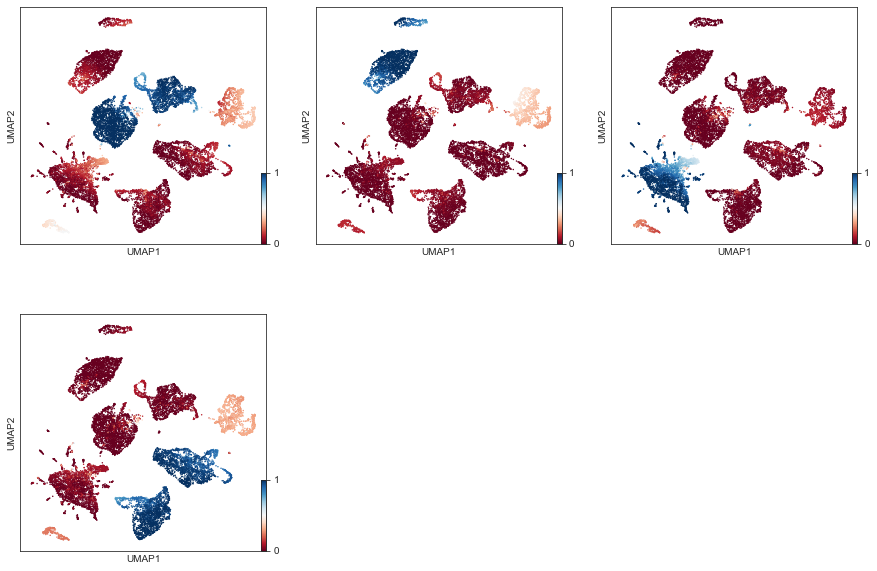

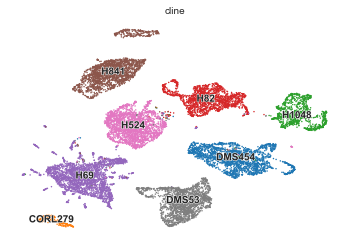

In [12]:
scv.pp.neighbors(X_magic)
scv.tl.umap(X_magic)
scv.pl.umap(X_magic, c = [S_matrix[i] for i in ['V1','V2','V3','V4']], components='1,2', show=False, figsize= (5,5),ncols = 3, frameon=True, cmap = 'RdBu')
scv.pl.umap(X_magic, c = 'cline')

In [13]:
X_magic.obsm['ParetoTI_S'] = S_matrix

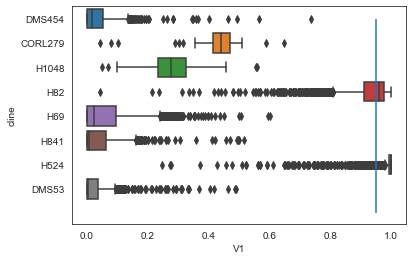

In [21]:
sns.boxplot(X_magic.obsm['ParetoTI_S']['V1'], X_magic.obs.cline)
plt.vlines(x = 0.95, ymin = 0, ymax = 8)

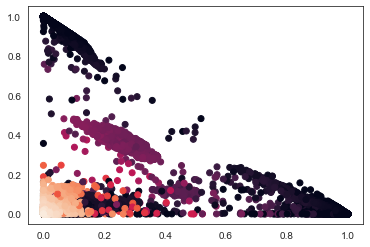

In [26]:
plt.scatter(X_magic.obsm['ParetoTI_S']['V1'],X_magic.obsm['ParetoTI_S']['V2'], c = X_magic.obsm['ParetoTI_S']['V4'])

In [19]:
tmp = X_magic.obsm['ParetoTI_S'].copy()

for arc in  X_magic.obsm['ParetoTI_S'].columns:
    closest = X_magic.obsm['ParetoTI_S'].loc[X_magic.obsm['ParetoTI_S'][arc].sort_values(ascending = False) > .95]
    tmp.loc[closest.index,'specialist'] = arc
X_magic.obs['specialists_ParetoTI_S'] = tmp.specialist
X_magic.obs['specialists_ParetoTI_S'].value_counts()

V1    3030
V4    2363
V3    1430
V2    1396
Name: specialists_ParetoTI_S, dtype: int64

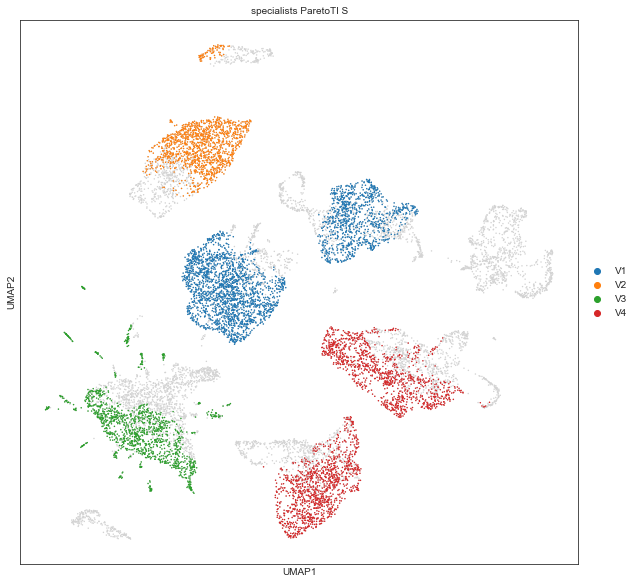

In [20]:
scv.pl.umap(X_magic, color = 'specialists_ParetoTI_S', figsize= (10,10), frameon=True, legend_loc = 'on right')


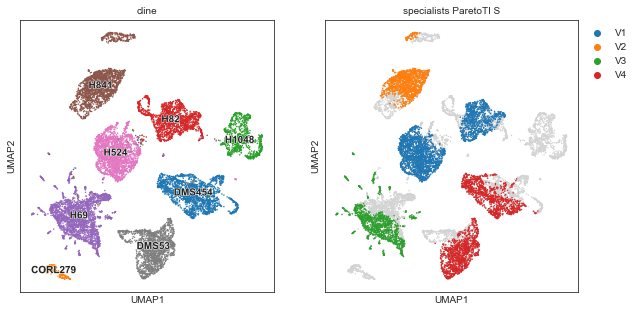

In [23]:
scv.pl.umap(X_magic, c = ['cline','specialists_ParetoTI_S'], components='1,2', figsize= (5,5), frameon=True, cmap = 'RdBu')


In [28]:
X_magic.obs = pd.merge(adata.obs.arc_aa_type,X_magic.obs, left_index=True, right_index=True)

In [30]:
X_magic.obs = pd.merge(adata.obs[[i for i in adata.obs if '_Score_pos' in i]],X_magic.obs, left_index=True, right_index=True)

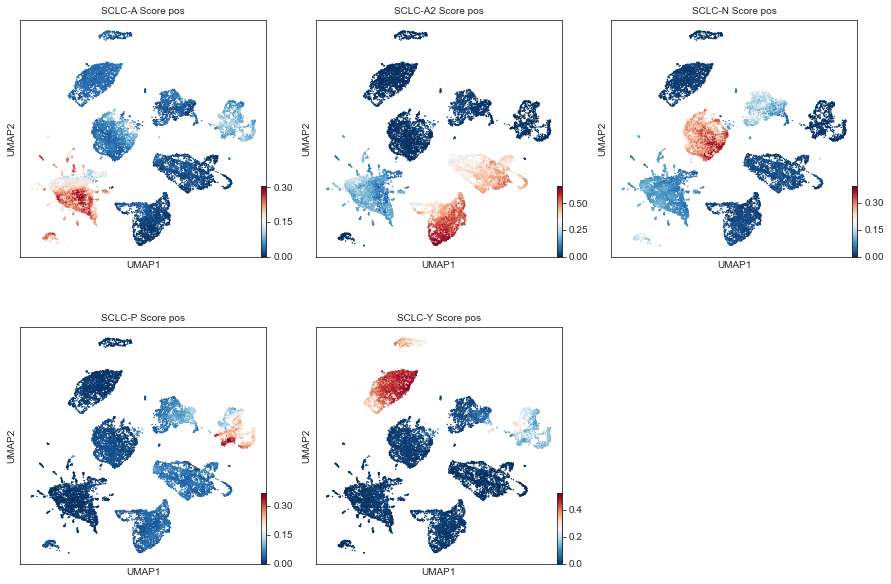

In [31]:
scv.pl.umap(X_magic, color = [i for i in adata.obs.columns if '_Score_pos' in i], legend_loc = 'on right', cmap='RdBu_r',
            figsize= (5,5), frameon=True,
            ncols = 3, smooth = True)

In [32]:
X_magic.obsm['ParetoTI_S'].columns = X_magic.obsm['ParetoTI_S'].columns.astype(str)


[<AxesSubplot:title={'center':'S matrix score'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'S matrix score'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'S matrix score'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'S matrix score'}, xlabel='UMAP1', ylabel='UMAP2'>]

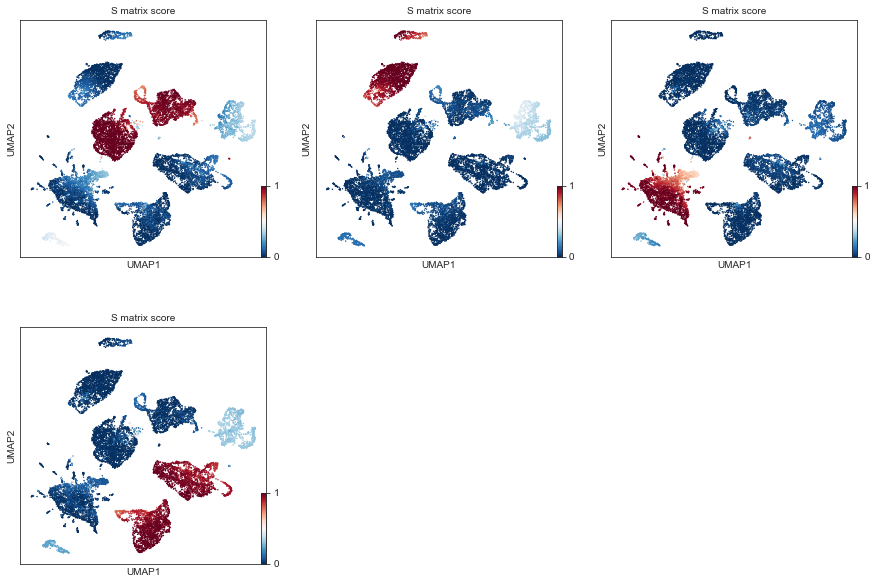

In [33]:
scv.pl.umap(X_magic, c = [X_magic.obsm['ParetoTI_S'][i] for i in X_magic.obsm['ParetoTI_S']], components='1,2', show=False, figsize= (5,5),ncols = 3, 
            title = 'S matrix score',
            frameon=True, cmap = 'RdBu_r')


In [34]:
adata.write_h5ad('../../out/cell-lines/adata_03b.h5ad')

In [51]:
X_magic.write_h5ad('../../out/cell-lines/X_magic_03b.h5ad')

## Enrichment of bulk archetype signatures

We want to follow the same pipeline as ParTI enrichment, so we need:
1. Distances to each archetype, to determine which bin to put cells into
2. Score for each cell that we want to test enrichment of (i.e. each signature score)
    1. We may want a cut-off of significance for the scores first (or a z score, for example), so that you can't get enrichment of insignificant scores
    2. For example, P may be "enriched" in one of the archetypes, but if the P score itself isn't significant, then its enrichment doesn't mean much.
3. We want to use  a Mann-Whitney test (with FDR corrected q < 0.1). We should split the data into 10 bins and test enrichment of the clsoest bin vs. the rest of the data. The closest bin should also be the maximum.

In [2]:
X_magic = sc.read_h5ad('../../out/cell-lines/X_magic_03b.h5ad')

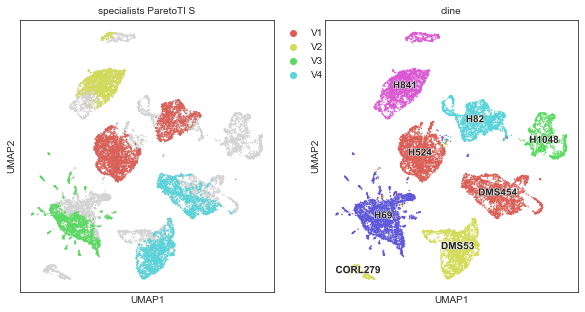

In [3]:
scv.pl.umap(X_magic, c = ['specialists_ParetoTI_S','cline'], components='1,2', figsize= (5,5), frameon=True, cmap = 'RdBu')


In [25]:
arc_ave.T

PC_1       PC_2       PC_3      PC_4      PC_5      PC_6      PC_7  \
V1  -7.253329  -8.195064 -12.536590 -1.826065  0.151867 -0.005887  0.000131   
V2 -12.385238  -9.493961  17.753219  3.403218 -0.494656 -0.122254 -0.053281   
V3  -2.597050  19.412634   0.095969 -0.055042  0.040704 -0.049345 -0.003231   
V4  25.675801  -5.026464   2.877451 -0.097243 -0.068134  0.012194  0.033125   

        PC_8      PC_9     PC_10     PC_11  
V1  0.046929 -0.020185  0.005534  0.442152  
V2 -0.095218 -0.132139 -0.136252  0.038070  
V3  0.003712  0.004163  0.020161  0.056473  
V4  0.016476 -0.001829 -0.056344 -0.109622

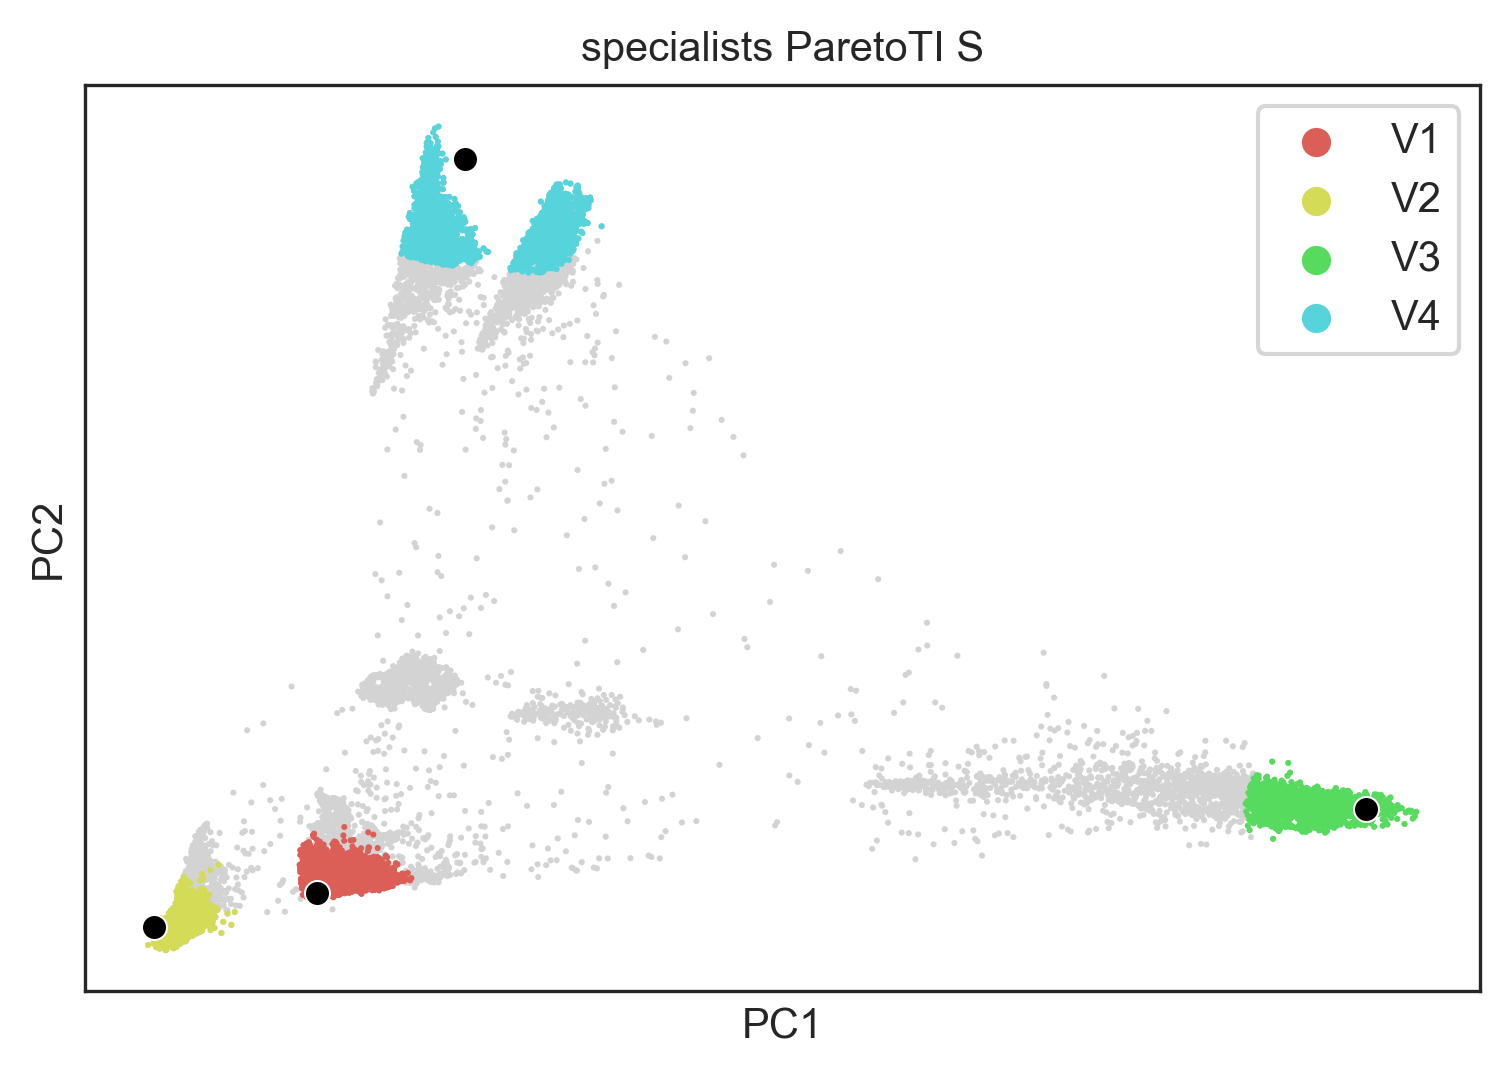

In [31]:
scv.pl.pca(X_magic, c = ['specialists_ParetoTI_S'], components='1,2', frameon=True, palette=sns.color_palette("hls"), legend_loc = 'on right',
          dpi = 300, show = False)
sns.scatterplot(data=arc_ave.T, x = 'PC_1', y= 'PC_2', color = 'k')
plt.savefig('./figures/scvelo_specialists_pca.png')


saving figure to file ./figures/scvelo_specialists_cline_pca.png


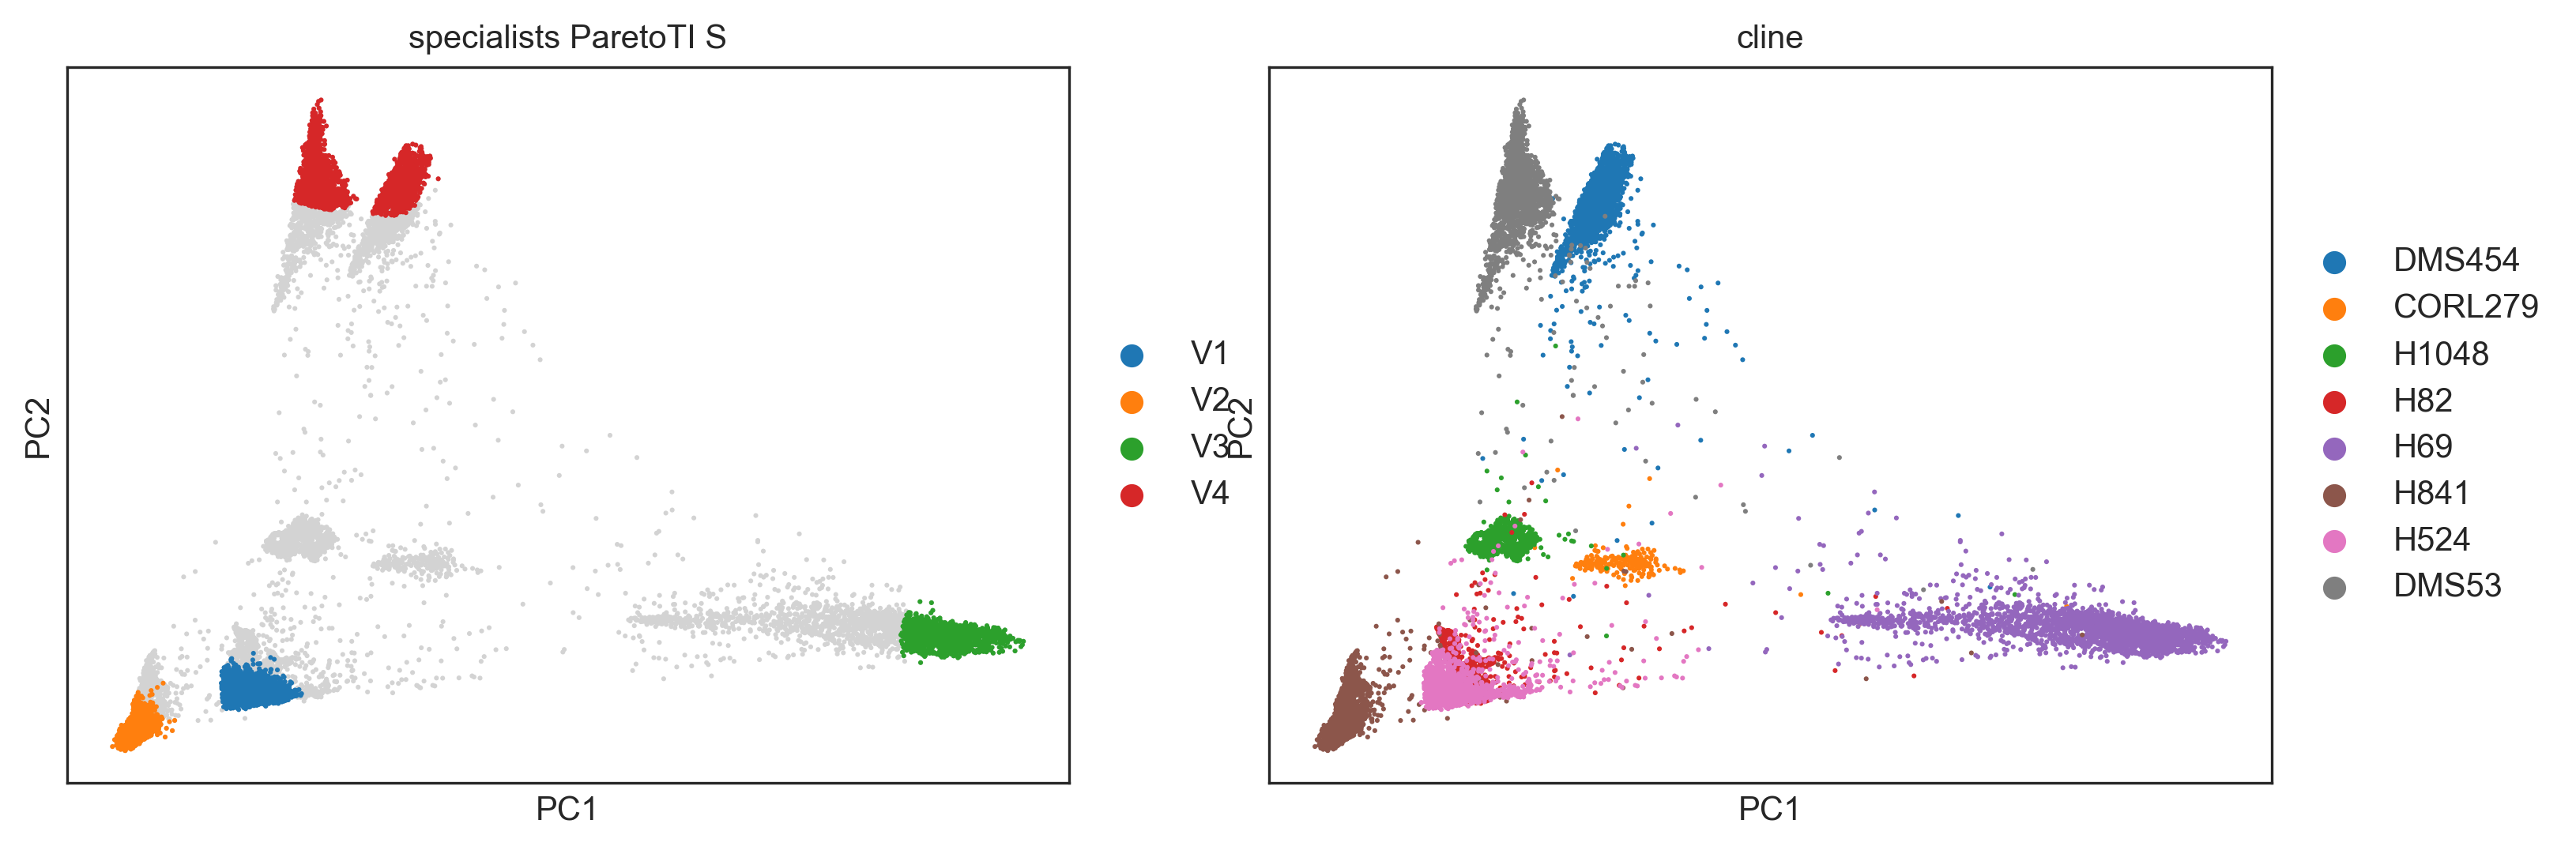

In [8]:
scv.pl.pca(X_magic, c = ['specialists_ParetoTI_S','cline'], components='1,2', frameon=True, cmap = 'RdBu', legend_loc = 'on right',
          dpi = 300, save = 'specialists_cline_pca.png')


saving figure to file ./figures/scvelo_bulk_score_umaps.png


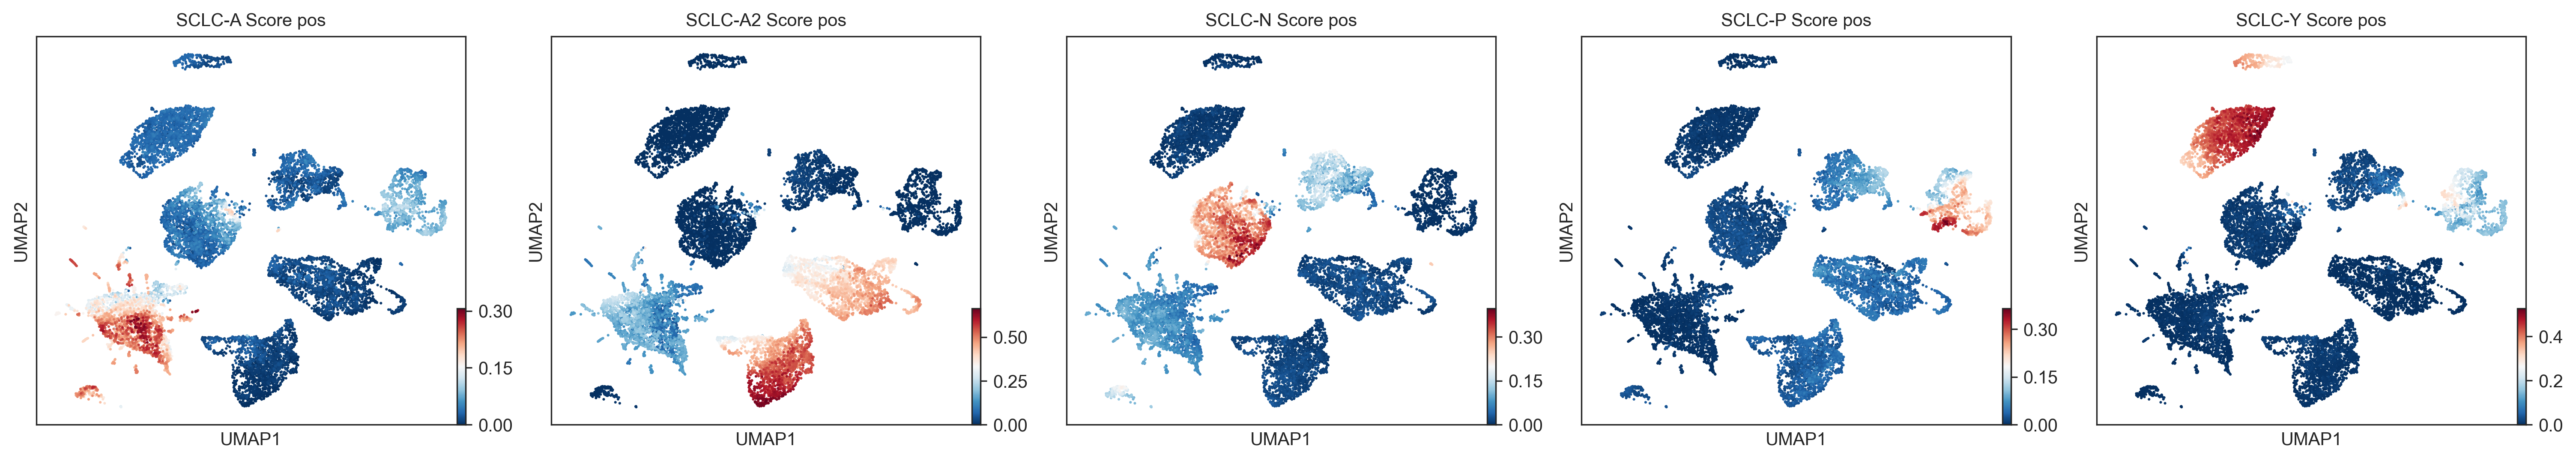

In [5]:
scv.pl.umap(X_magic, color = [i for i in X_magic.obs.columns if '_Score_pos' in i], legend_loc = 'on right', cmap='RdBu_r',
            figsize= (5,4), frameon=True, dpi = 300,
            ncols = 5, smooth = True, save = 'bulk_score_umaps.png')

saving figure to file ./figures/scvelo_bulk_score_pcas.png


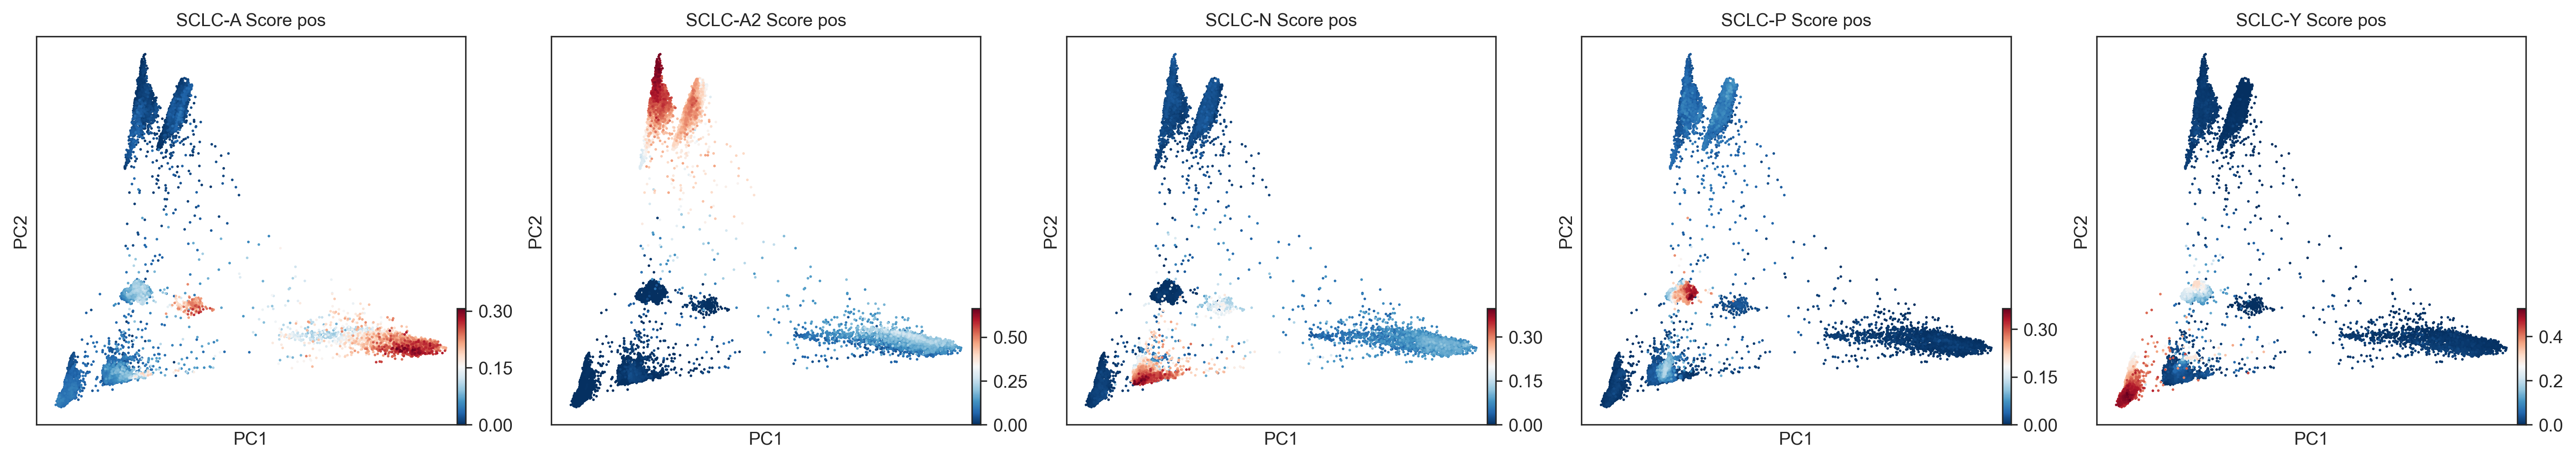

In [6]:
scv.pl.pca(X_magic, color = [i for i in X_magic.obs.columns if '_Score_pos' in i], legend_loc = 'on right', cmap='RdBu_r',
            figsize= (5,4), frameon=True, dpi = 300,
            ncols = 5, smooth = True, save = 'bulk_score_pcas.png')

Archetype: V1


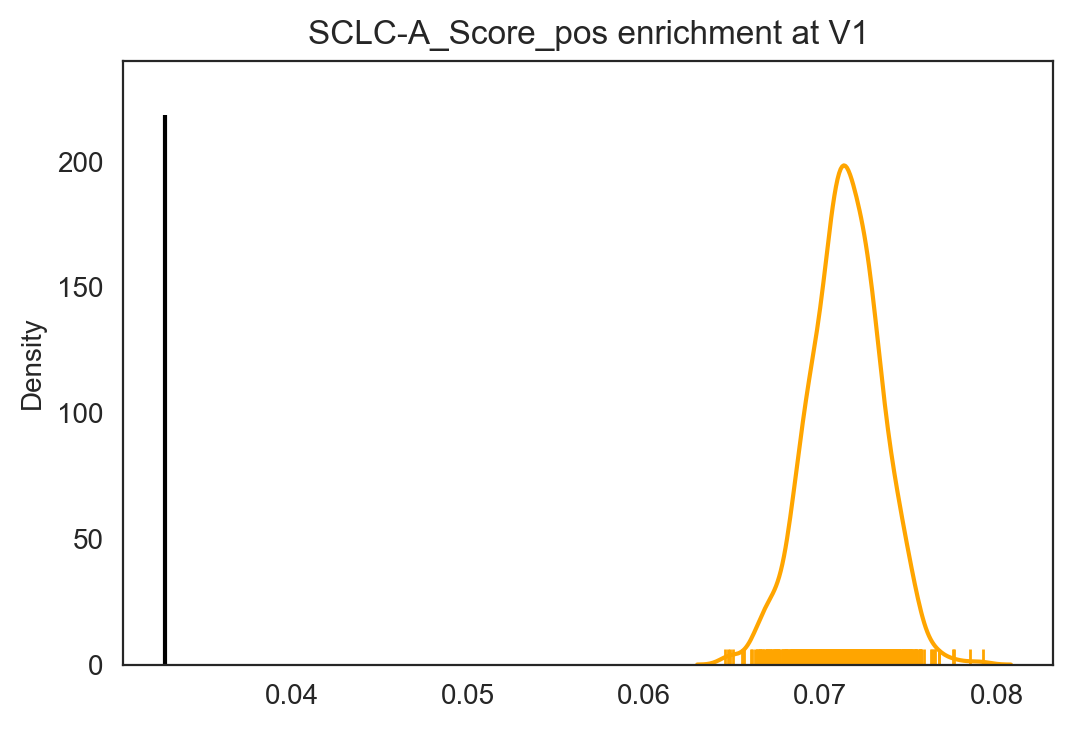

	 p-value for SCLC-A_Score_pos: 1.0


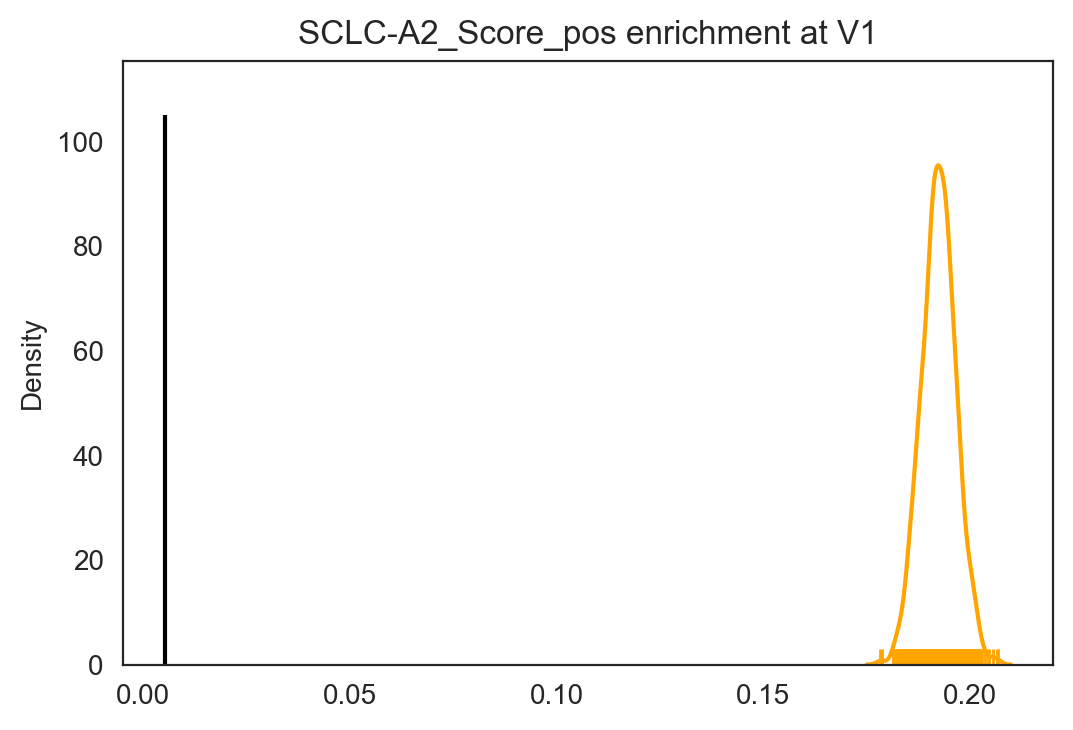

	 p-value for SCLC-A2_Score_pos: 1.0


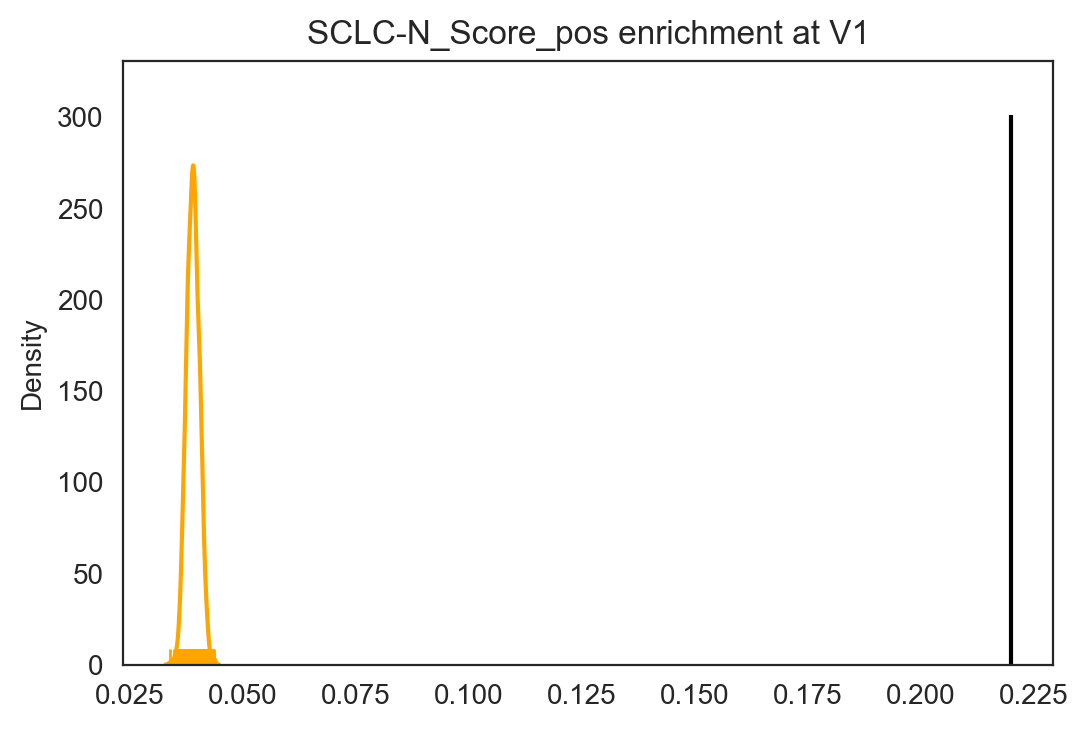

	 p-value for SCLC-N_Score_pos: 0.0


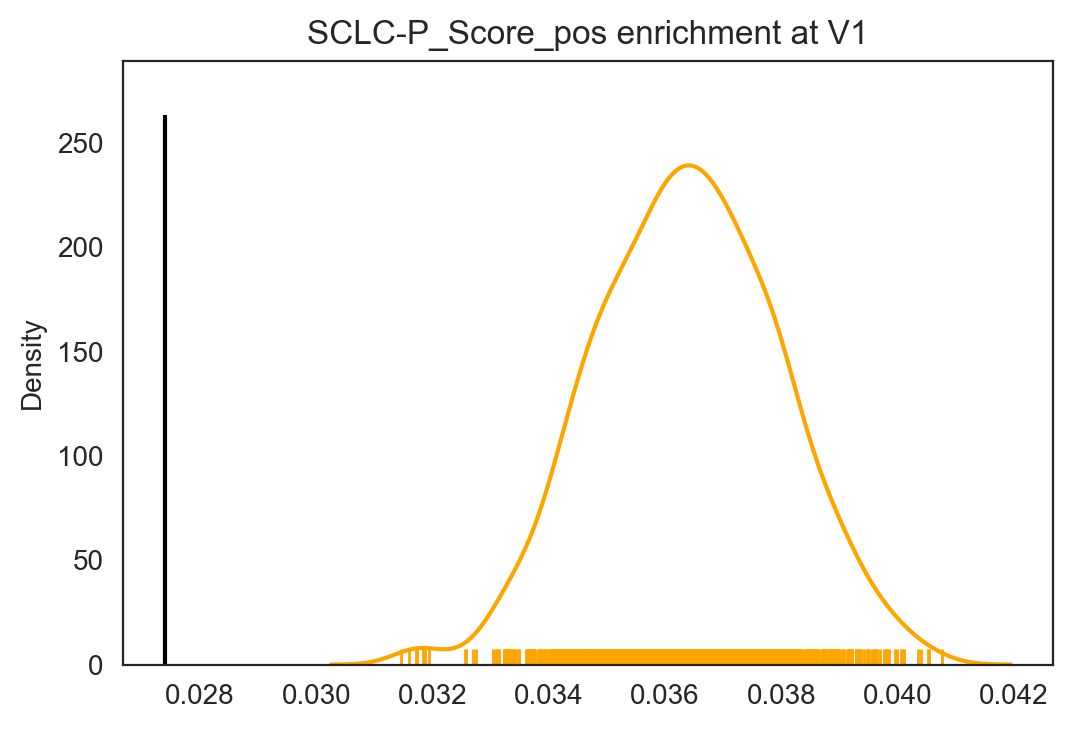

	 p-value for SCLC-P_Score_pos: 1.0


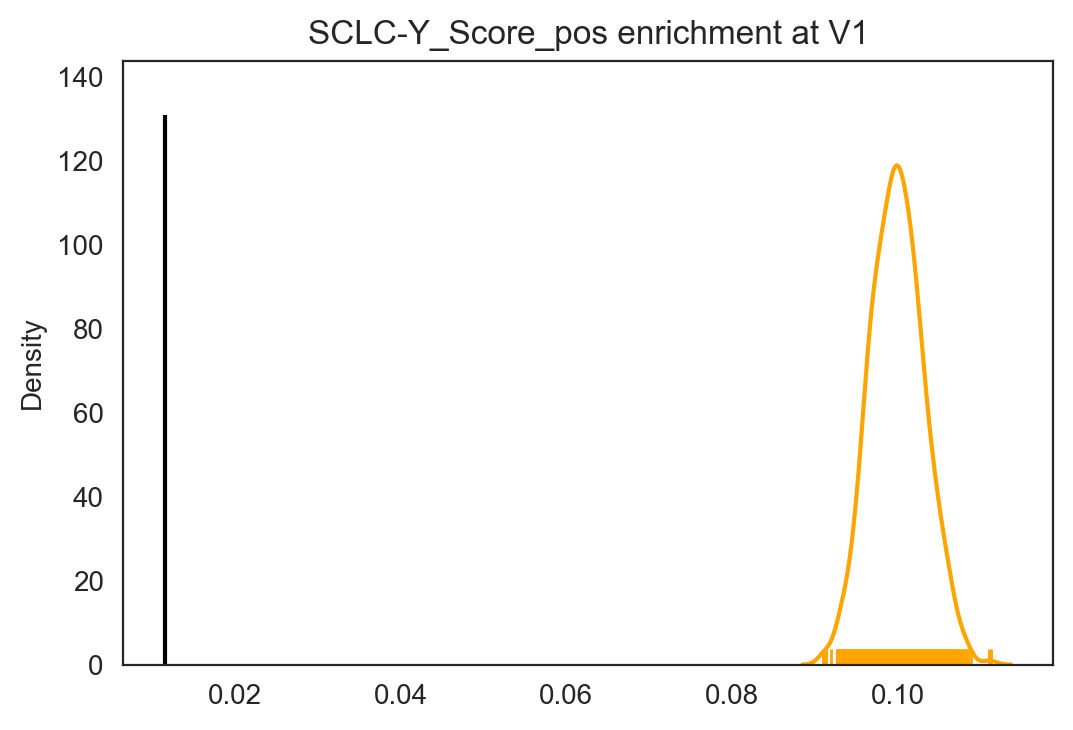

	 p-value for SCLC-Y_Score_pos: 1.0
Archetype: V2


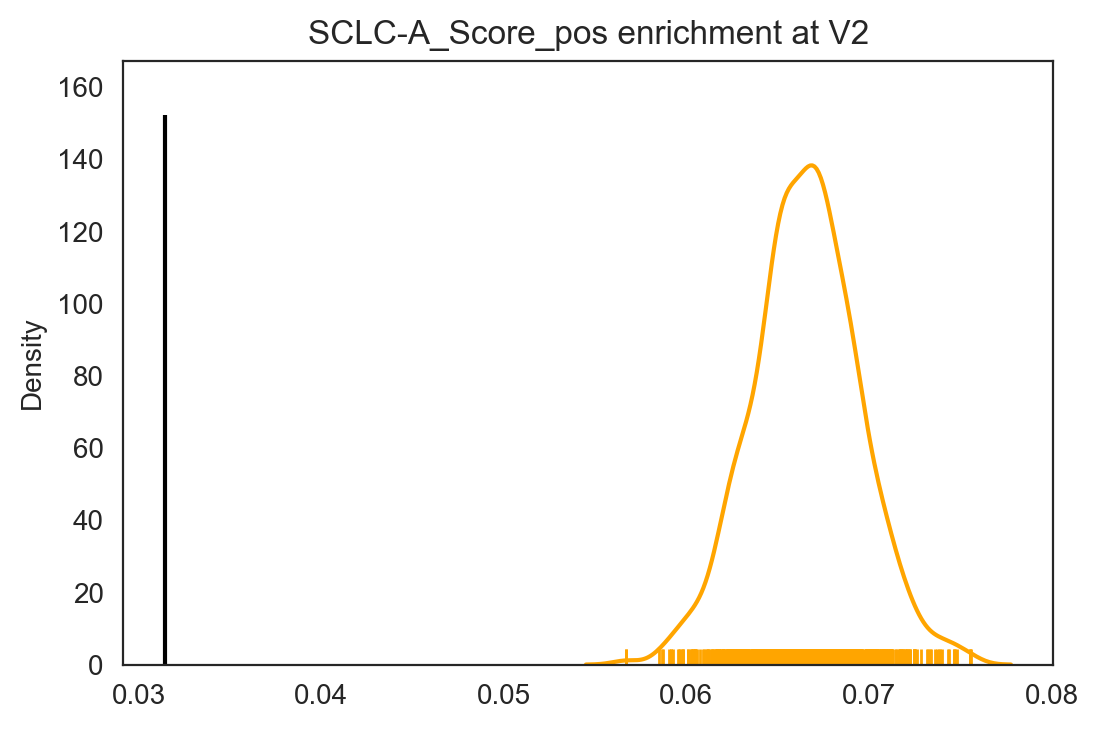

	 p-value for SCLC-A_Score_pos: 1.0


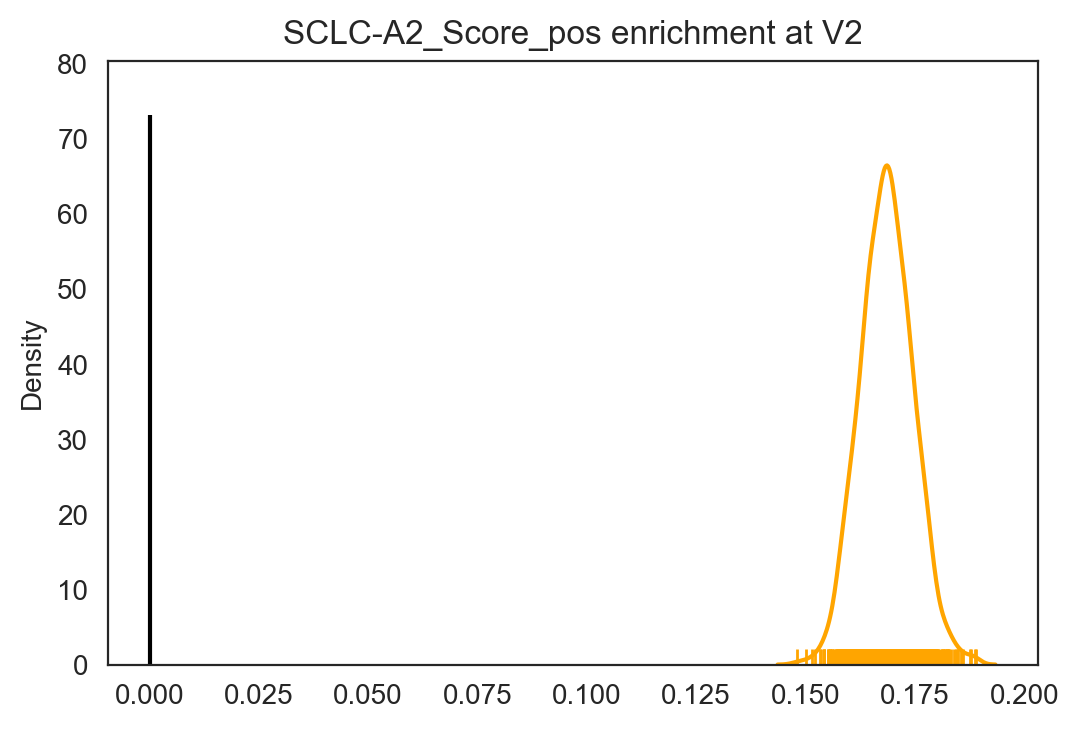

	 p-value for SCLC-A2_Score_pos: 1.0


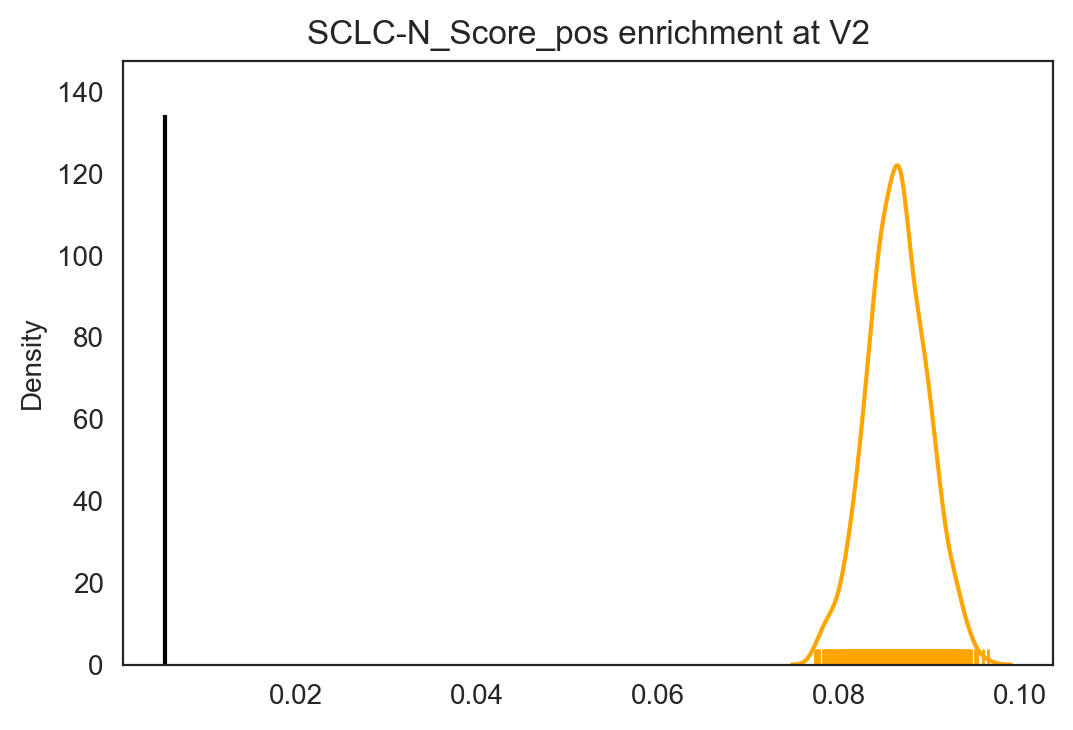

	 p-value for SCLC-N_Score_pos: 1.0


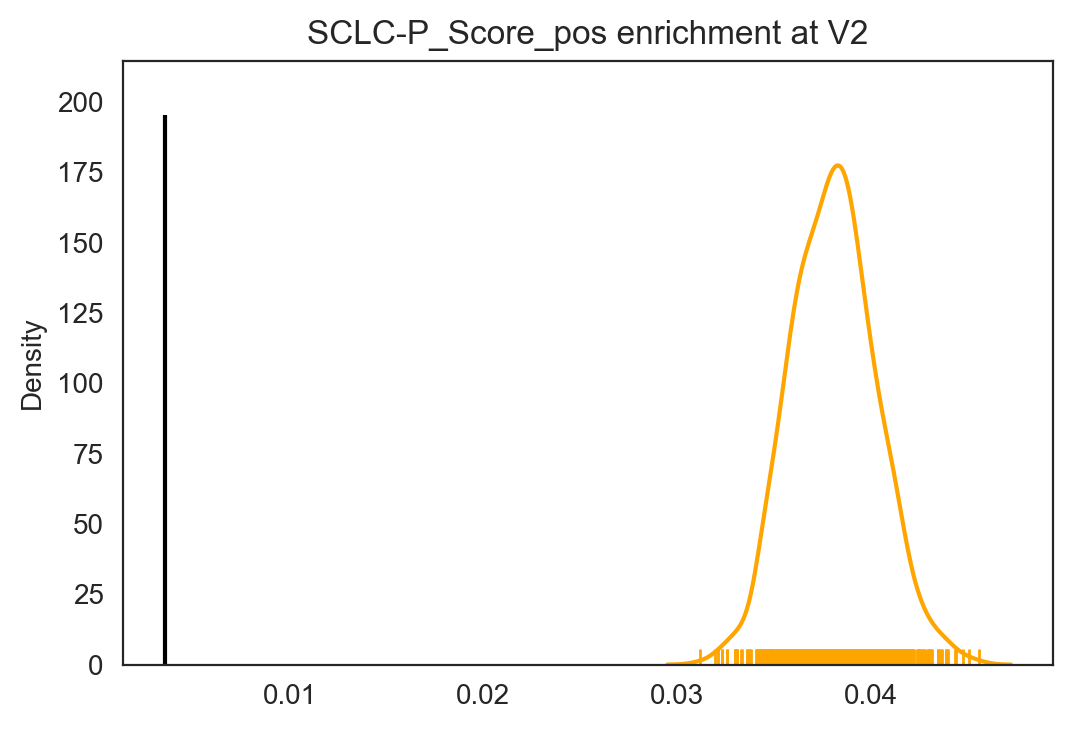

	 p-value for SCLC-P_Score_pos: 1.0


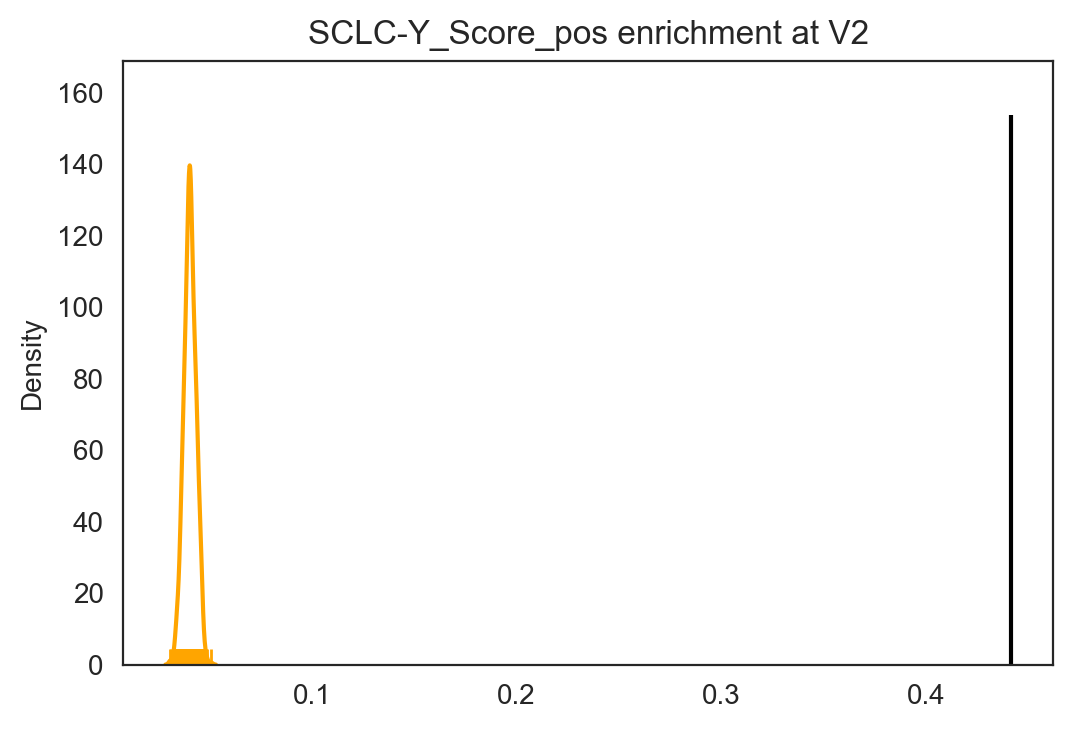

	 p-value for SCLC-Y_Score_pos: 0.0
Archetype: V3


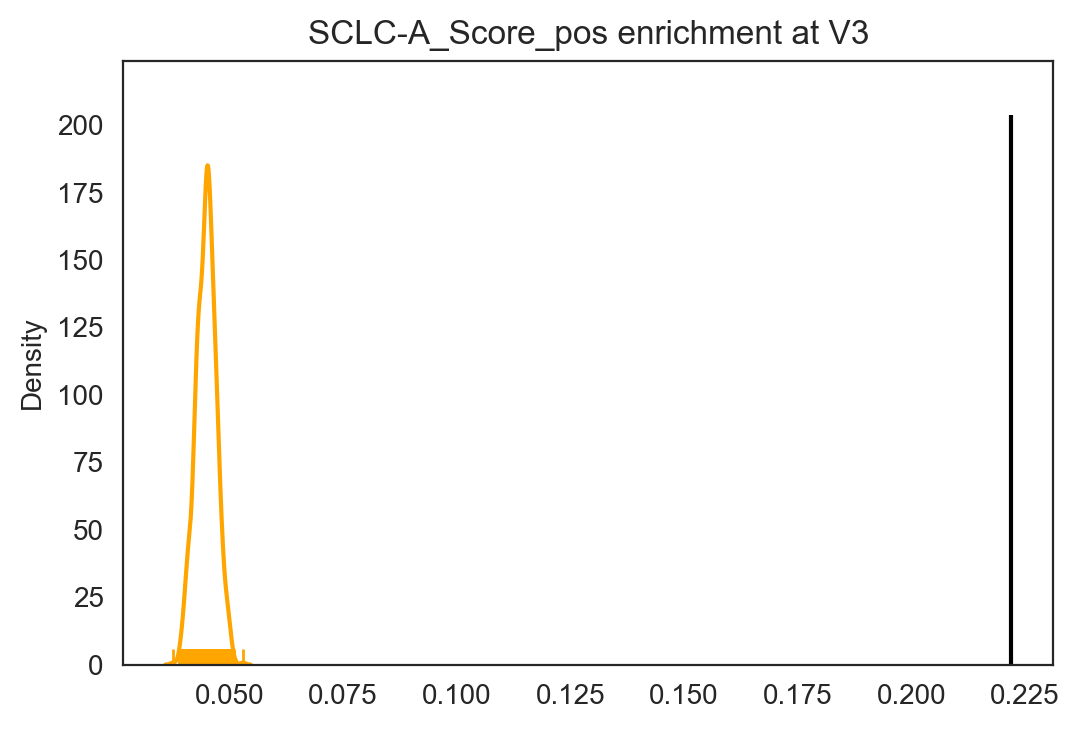

	 p-value for SCLC-A_Score_pos: 0.0


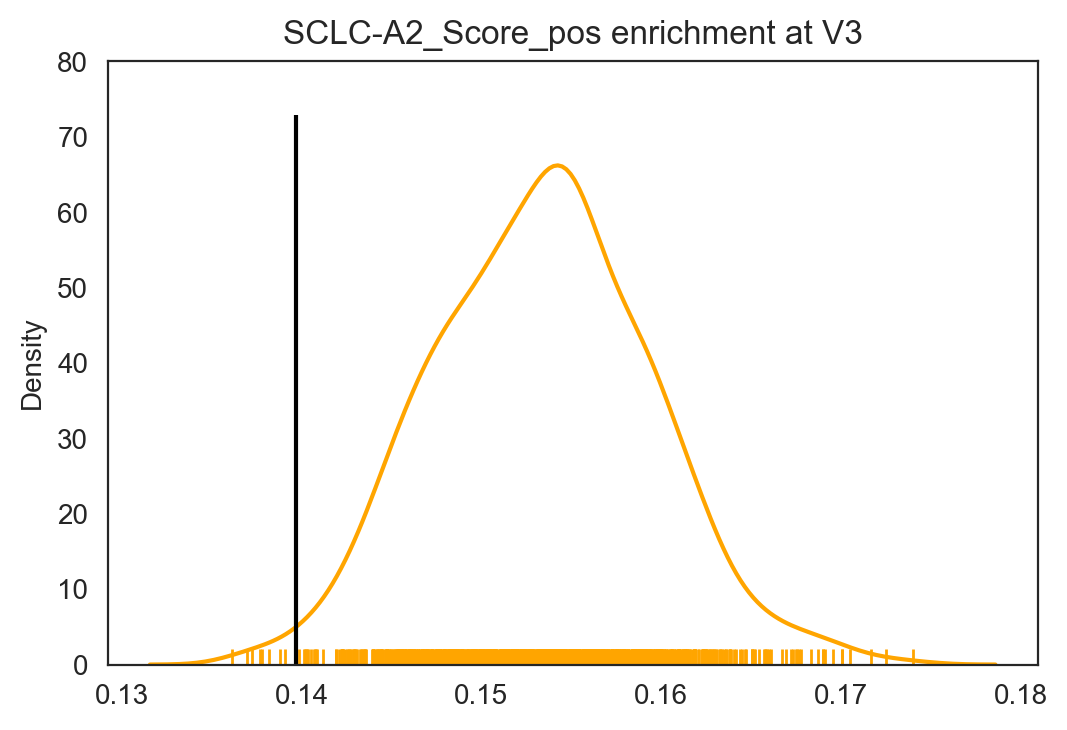

	 p-value for SCLC-A2_Score_pos: 0.992


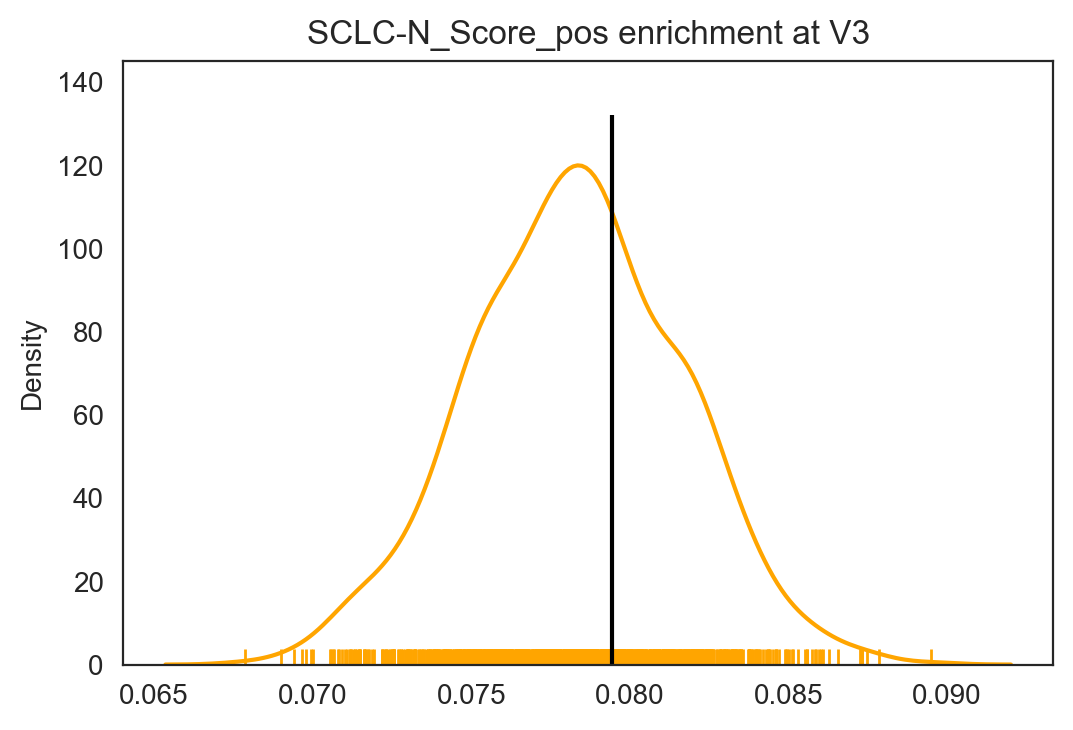

	 p-value for SCLC-N_Score_pos: 0.3540000000000001


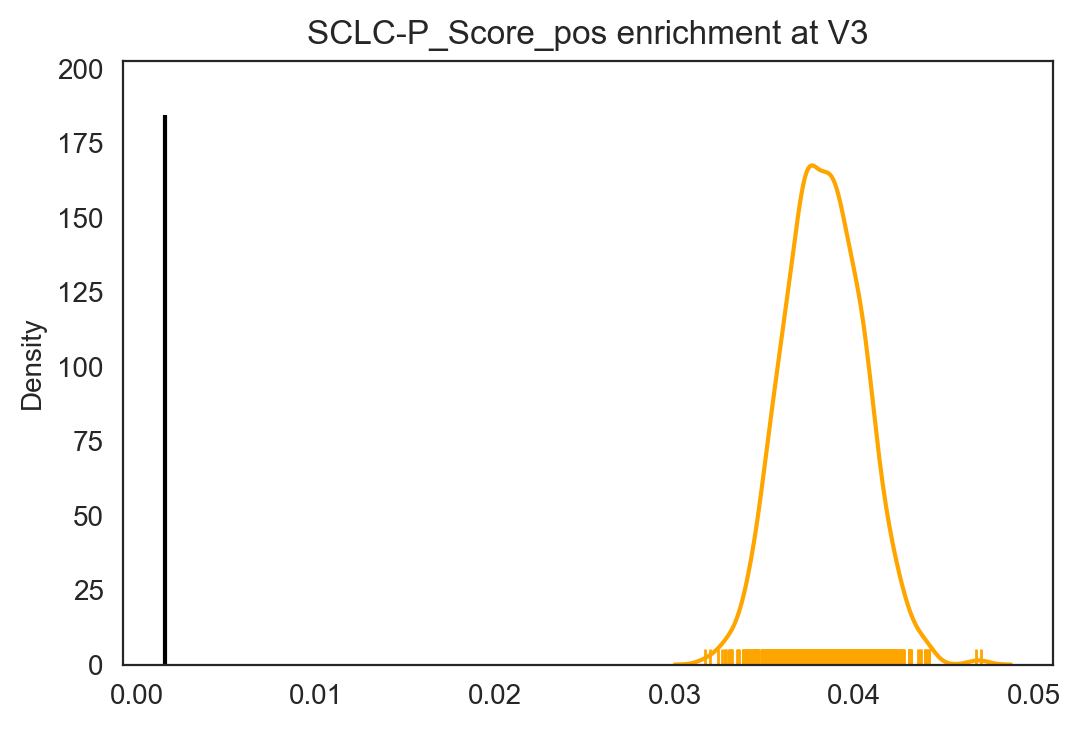

	 p-value for SCLC-P_Score_pos: 1.0


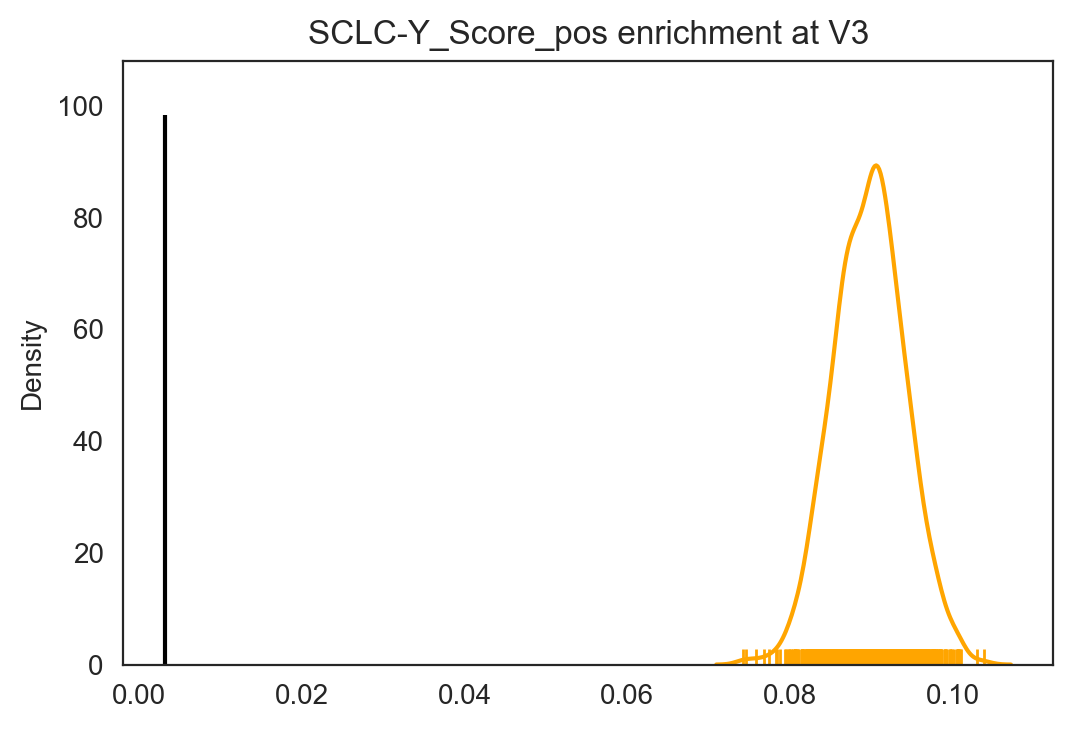

	 p-value for SCLC-Y_Score_pos: 1.0
Archetype: V4


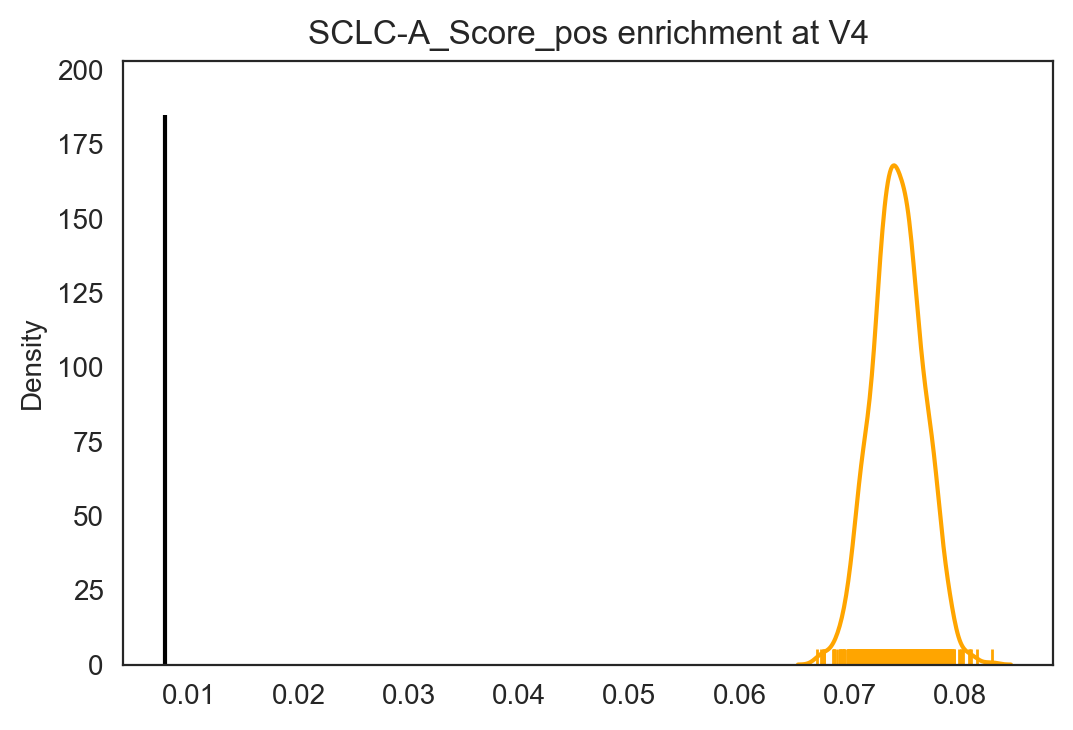

	 p-value for SCLC-A_Score_pos: 1.0


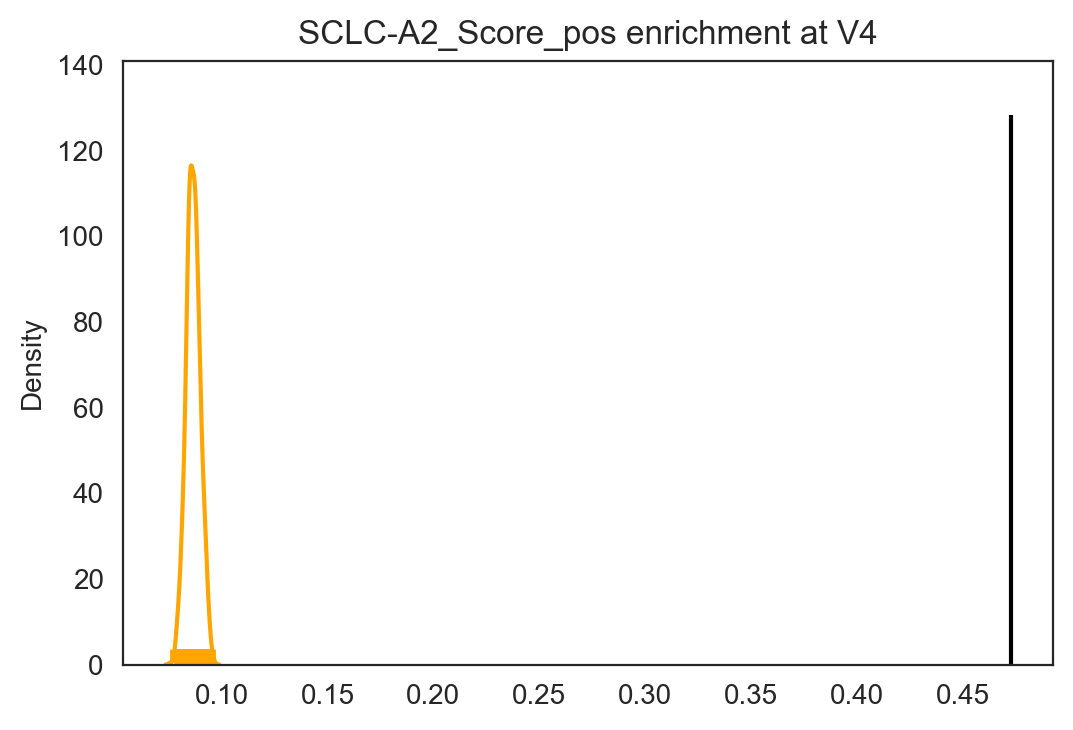

	 p-value for SCLC-A2_Score_pos: 0.0


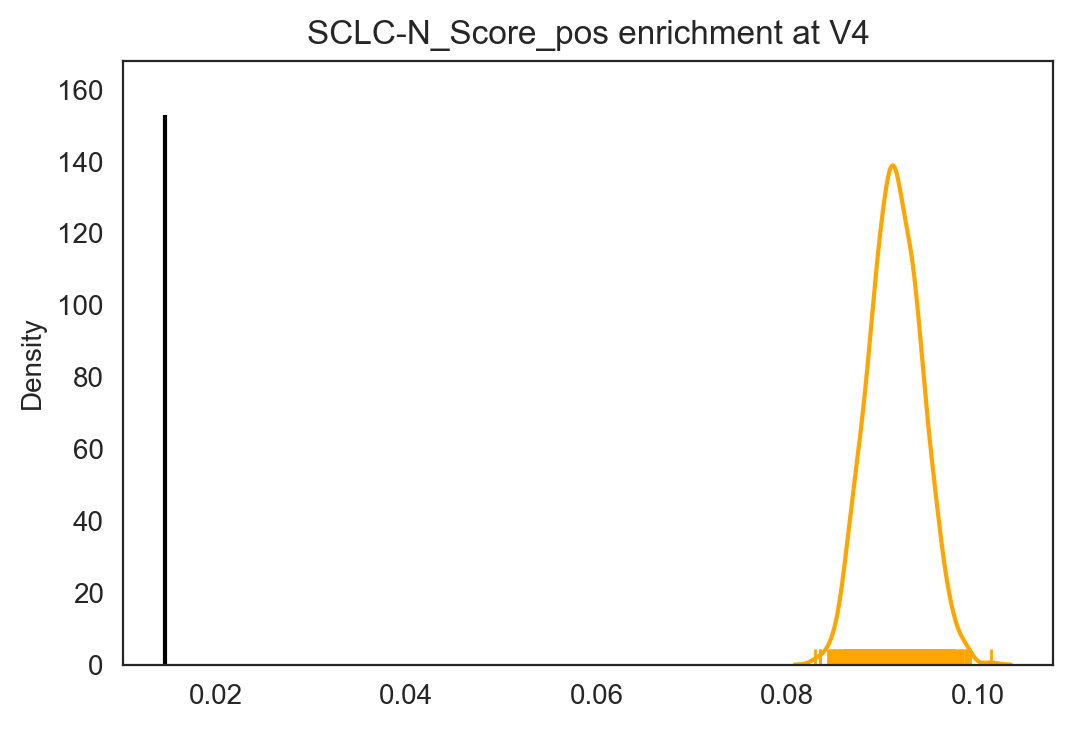

	 p-value for SCLC-N_Score_pos: 1.0


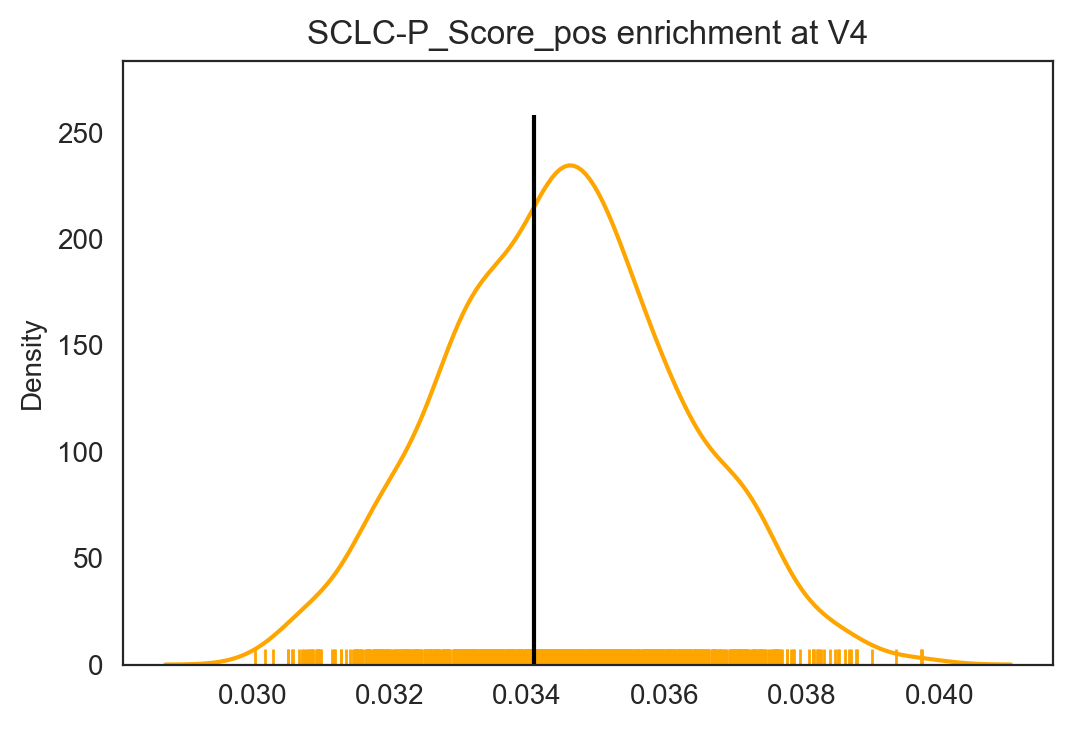

	 p-value for SCLC-P_Score_pos: 0.605


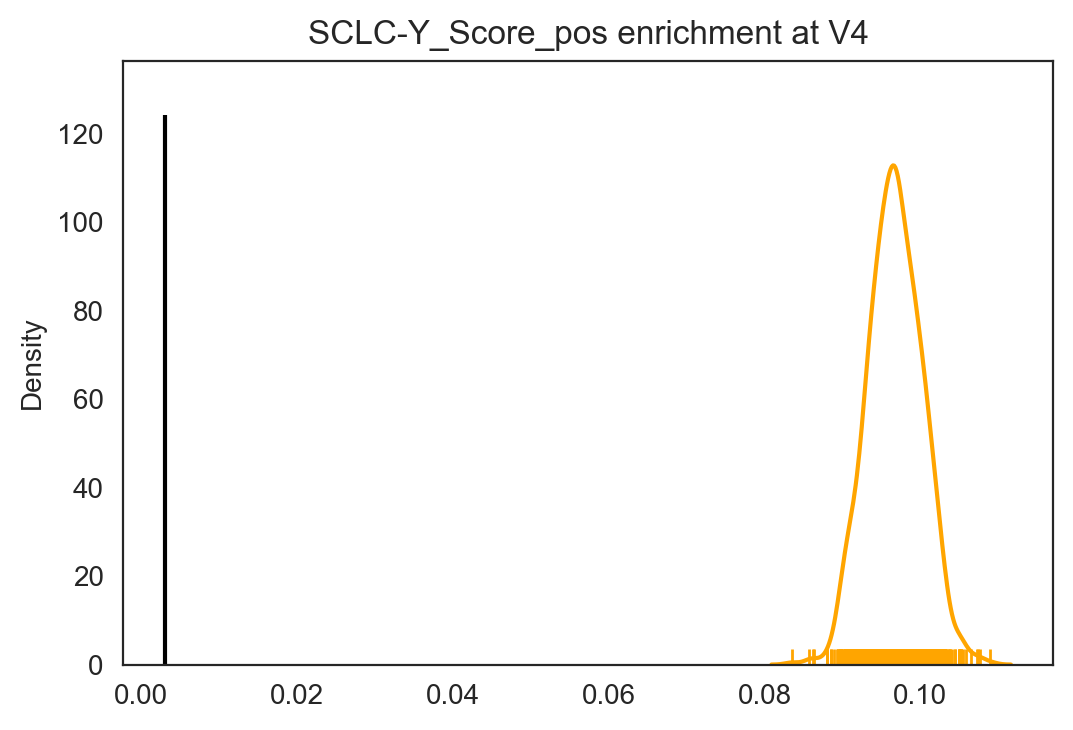

	 p-value for SCLC-Y_Score_pos: 1.0


In [4]:
score = X_magic.obs[[i for i in X_magic.obs if '_Score_pos' in i]]
score = score.fillna(0)
p_values_mean_corr, p_values_mean = mb.ar.permutation_enrichment_test(X_magic, score, plot = True, stat = 'mean', verbose = False, correction='holm', figsize = (6,4), save = 'enrichment.pdf')

In [5]:
p_values_mean_corr 

variable SCLC-A2_Score_pos SCLC-A_Score_pos SCLC-N_Score_pos SCLC-P_Score_pos  \
id                                                                              
V1                       1                1              0.0                1   
V2                       1                1                1                1   
V3                       1              0.0                1                1   
V4                     0.0                1                1                1   

variable SCLC-Y_Score_pos  
id                         
V1                      1  
V2                    0.0  
V3                      1  
V4                      1

In [9]:
 X_magic.obs['ParetoTI_specialists'] = [{'V1':'N',
 'V2':'Y',
 'V3':'A',
 'V4':'A2',
 np.nan: np.nan}[i] for i in X_magic.obs.specialists_ParetoTI_S]

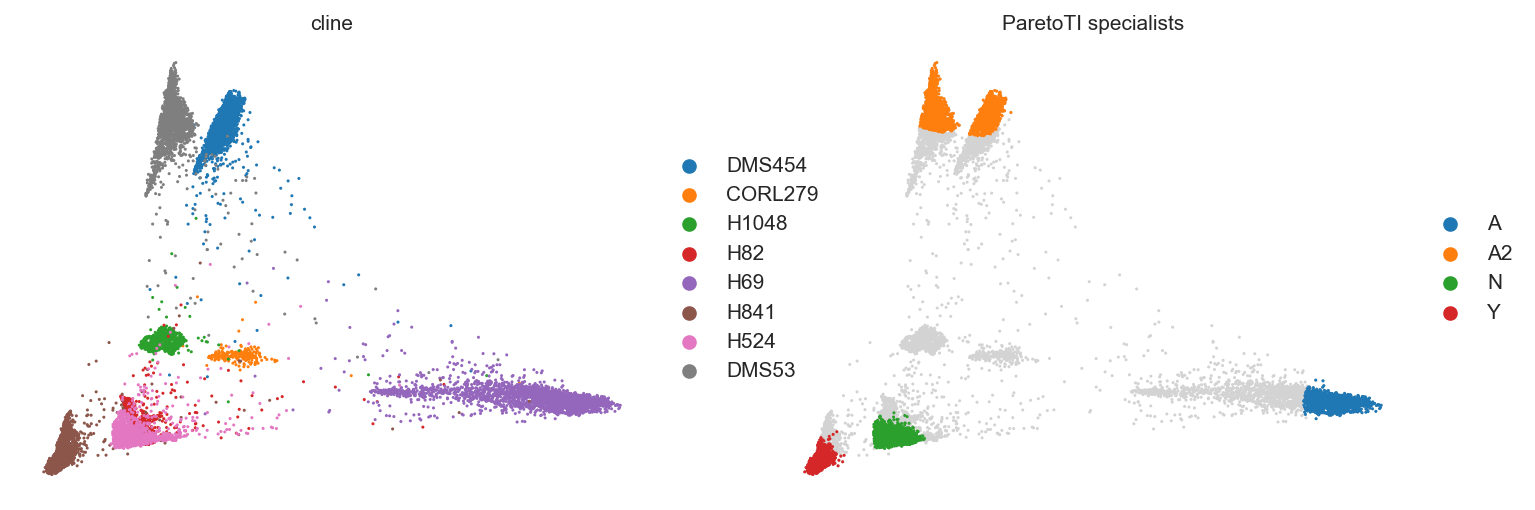

In [12]:
scv.pl.pca(X_magic, color = ['cline','ParetoTI_specialists'], legend_loc = 'on right', dpi = 150)

<AxesSubplot:xlabel='cline'>

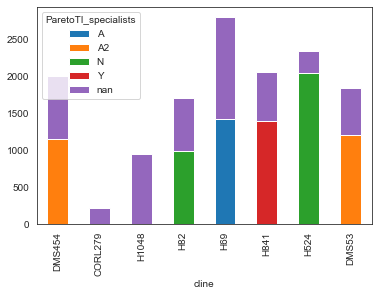

In [4]:
pd.crosstab(X_magic.obs['cline'],X_magic.obs['ParetoTI_specialists'].astype(str)).plot.bar(stacked = True, sort_columns = True)


In [14]:
X_magic.write_h5ad('../../out/cell-lines/X_magic_03b.h5ad')

In [2]:
X_magic = sc.read_h5ad('../../out/cell-lines/X_magic_03b.h5ad')

('V3', 'V4', 'V2', 'V1')


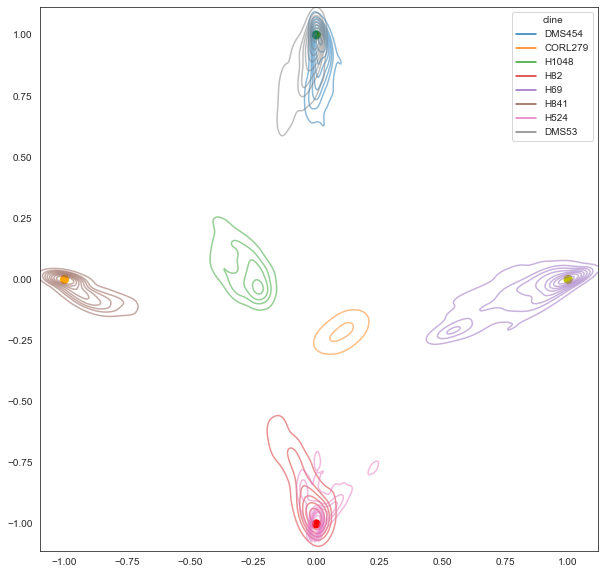

('V3', 'V4', 'V2', 'V1')

In [3]:
mb.pl.cap_plot(pd.DataFrame(X_magic.obsm['ParetoTI_S'], index = X_magic.obs_names),hue = X_magic.obs.cline,plot_type='kde', 
         arc_hue_dict={('V'+str(i+1)):j for i,j in enumerate(['r','orange','y','g','b'])}, save = 'cap_plot_ParetoTI_S.pdf')

('V3', 'V4', 'V2', 'V1')


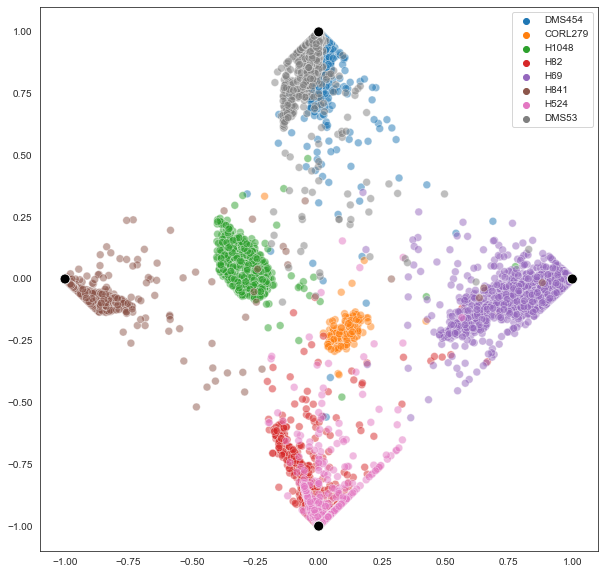

('V3', 'V4', 'V2', 'V1')

In [40]:
mb.pl.cap_plot(pd.DataFrame(X_magic.obsm['ParetoTI_S'], index = X_magic.obs_names),hue = X_magic.obs.cline,
         arc_hue_dict={('V'+str(i+1)):j for i,j in enumerate(['k','k','k','k','k'])}, save = 'cap_scatterplot_ParetoTI_S.png')

('V3', 'V4', 'V2', 'V1')


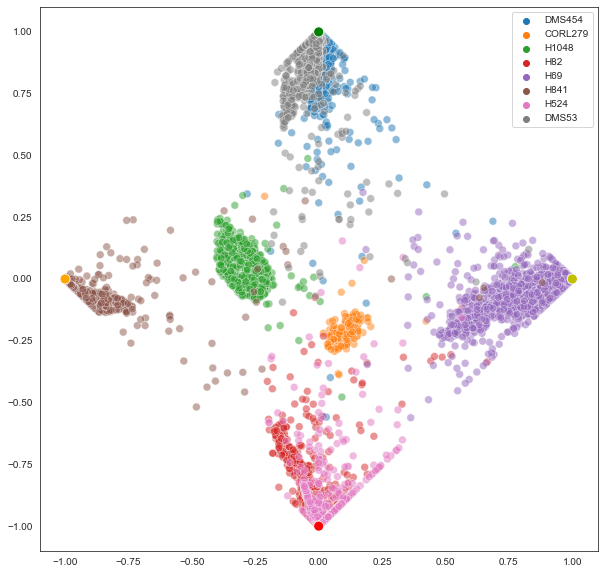

('V3', 'V4', 'V2', 'V1')

In [4]:
mb.pl.cap_plot(pd.DataFrame(X_magic.obsm['ParetoTI_S'], index = X_magic.obs_names),hue = X_magic.obs.cline,
         arc_hue_dict={('V'+str(i+1)):j for i,j in enumerate(['r','orange','y','g','b'])}, save = 'cap_scatterplot_ParetoTI_S.pdf')

In [48]:
from itertools import permutations

sns.set_style("whitegrid")

def proximity(probabilities):
    # for each pair of arcs, calculate proximity as sum of cross product
    # list of pairs in order
    l = [[i, i + 1] for i in range(len(probabilities.columns) - 1)]
    l.append([len(probabilities.columns) - 1, 0])
    best_dlk = 0
    best_perm = None
    for perm in list(permutations(probabilities.columns, len(probabilities.columns))):
        d_lk = 0
        for pair in l:
            # print(np.dot(probabilities[perm[pair[0]]], probabilities[perm[pair[1]]]))
            d_lk += np.dot(probabilities[perm[pair[0]]], probabilities[perm[pair[1]]])
        if d_lk > best_dlk:
            best_dlk = d_lk
            best_perm = perm
    return best_dlk, best_perm


def cap_plot(
    probabilities,
    hue=None,
    plot_type="scatterplot",
    fill=False,
    levels=10,
    arc_hue_dict={
        "SCLC-A_Score_pos": "r",
        "SCLC-P_Score_pos": "blue",
        "SCLC-A2_Score_pos": "orange",
        "SCLC-N_Score_pos": "green",
        "SCLC-Y_Score_pos": "purple",
    },
    save=None,
):

    probabilities = probabilities.dropna()

    n_arcs = len(probabilities.columns)

    best_dlk, best_perm = proximity(probabilities)
    # single assignment

    angles = np.linspace(0, 360, n_arcs, endpoint=False)
    # assign arcs to angles
    print(best_perm)
    ang_dict = {i: k for i, k in zip(best_perm, angles)}
    # given assignment, project probabilities to cartesian coordinates
    # each data point
    # x_i
    x = [
        probabilities[list(best_perm)]
        .loc[i]
        .dot(np.cos(np.radians([ang_dict[o] for o in best_perm])))
        for i, r in probabilities.iterrows()
    ]
    # y_i
    y = [
        probabilities[list(best_perm)]
        .loc[i]
        .dot(np.sin(np.radians([ang_dict[o] for o in best_perm])))
        for i, r in probabilities.iterrows()
    ]

    # archetype locations
    x_arc = np.cos(np.radians([ang_dict[o] for o in best_perm]))
    y_arc = np.sin(np.radians([ang_dict[o] for o in best_perm]))

    plt.figure(figsize=(10, 10), dpi = 300)
    if plot_type == "scatterplot":
        sns.scatterplot(x, y, s=60, alpha=0.5, hue=hue.loc[probabilities.index], legend = False)
        sns.scatterplot(x_arc, y_arc, s=100, c=[arc_hue_dict[i] for i in best_perm])
    elif plot_type == "kde":
        sns.scatterplot(x_arc, y_arc, s=100, c=[arc_hue_dict[i] for i in best_perm])
        sns.kdeplot(
            x, y, hue=hue.loc[probabilities.index], alpha=0.5, fill=fill, levels=levels
        )
    if type(save) != type(None):
        plt.savefig(f"./figures/{save}")
    plt.show()
    return best_perm


('V3', 'V4', 'V2', 'V1')


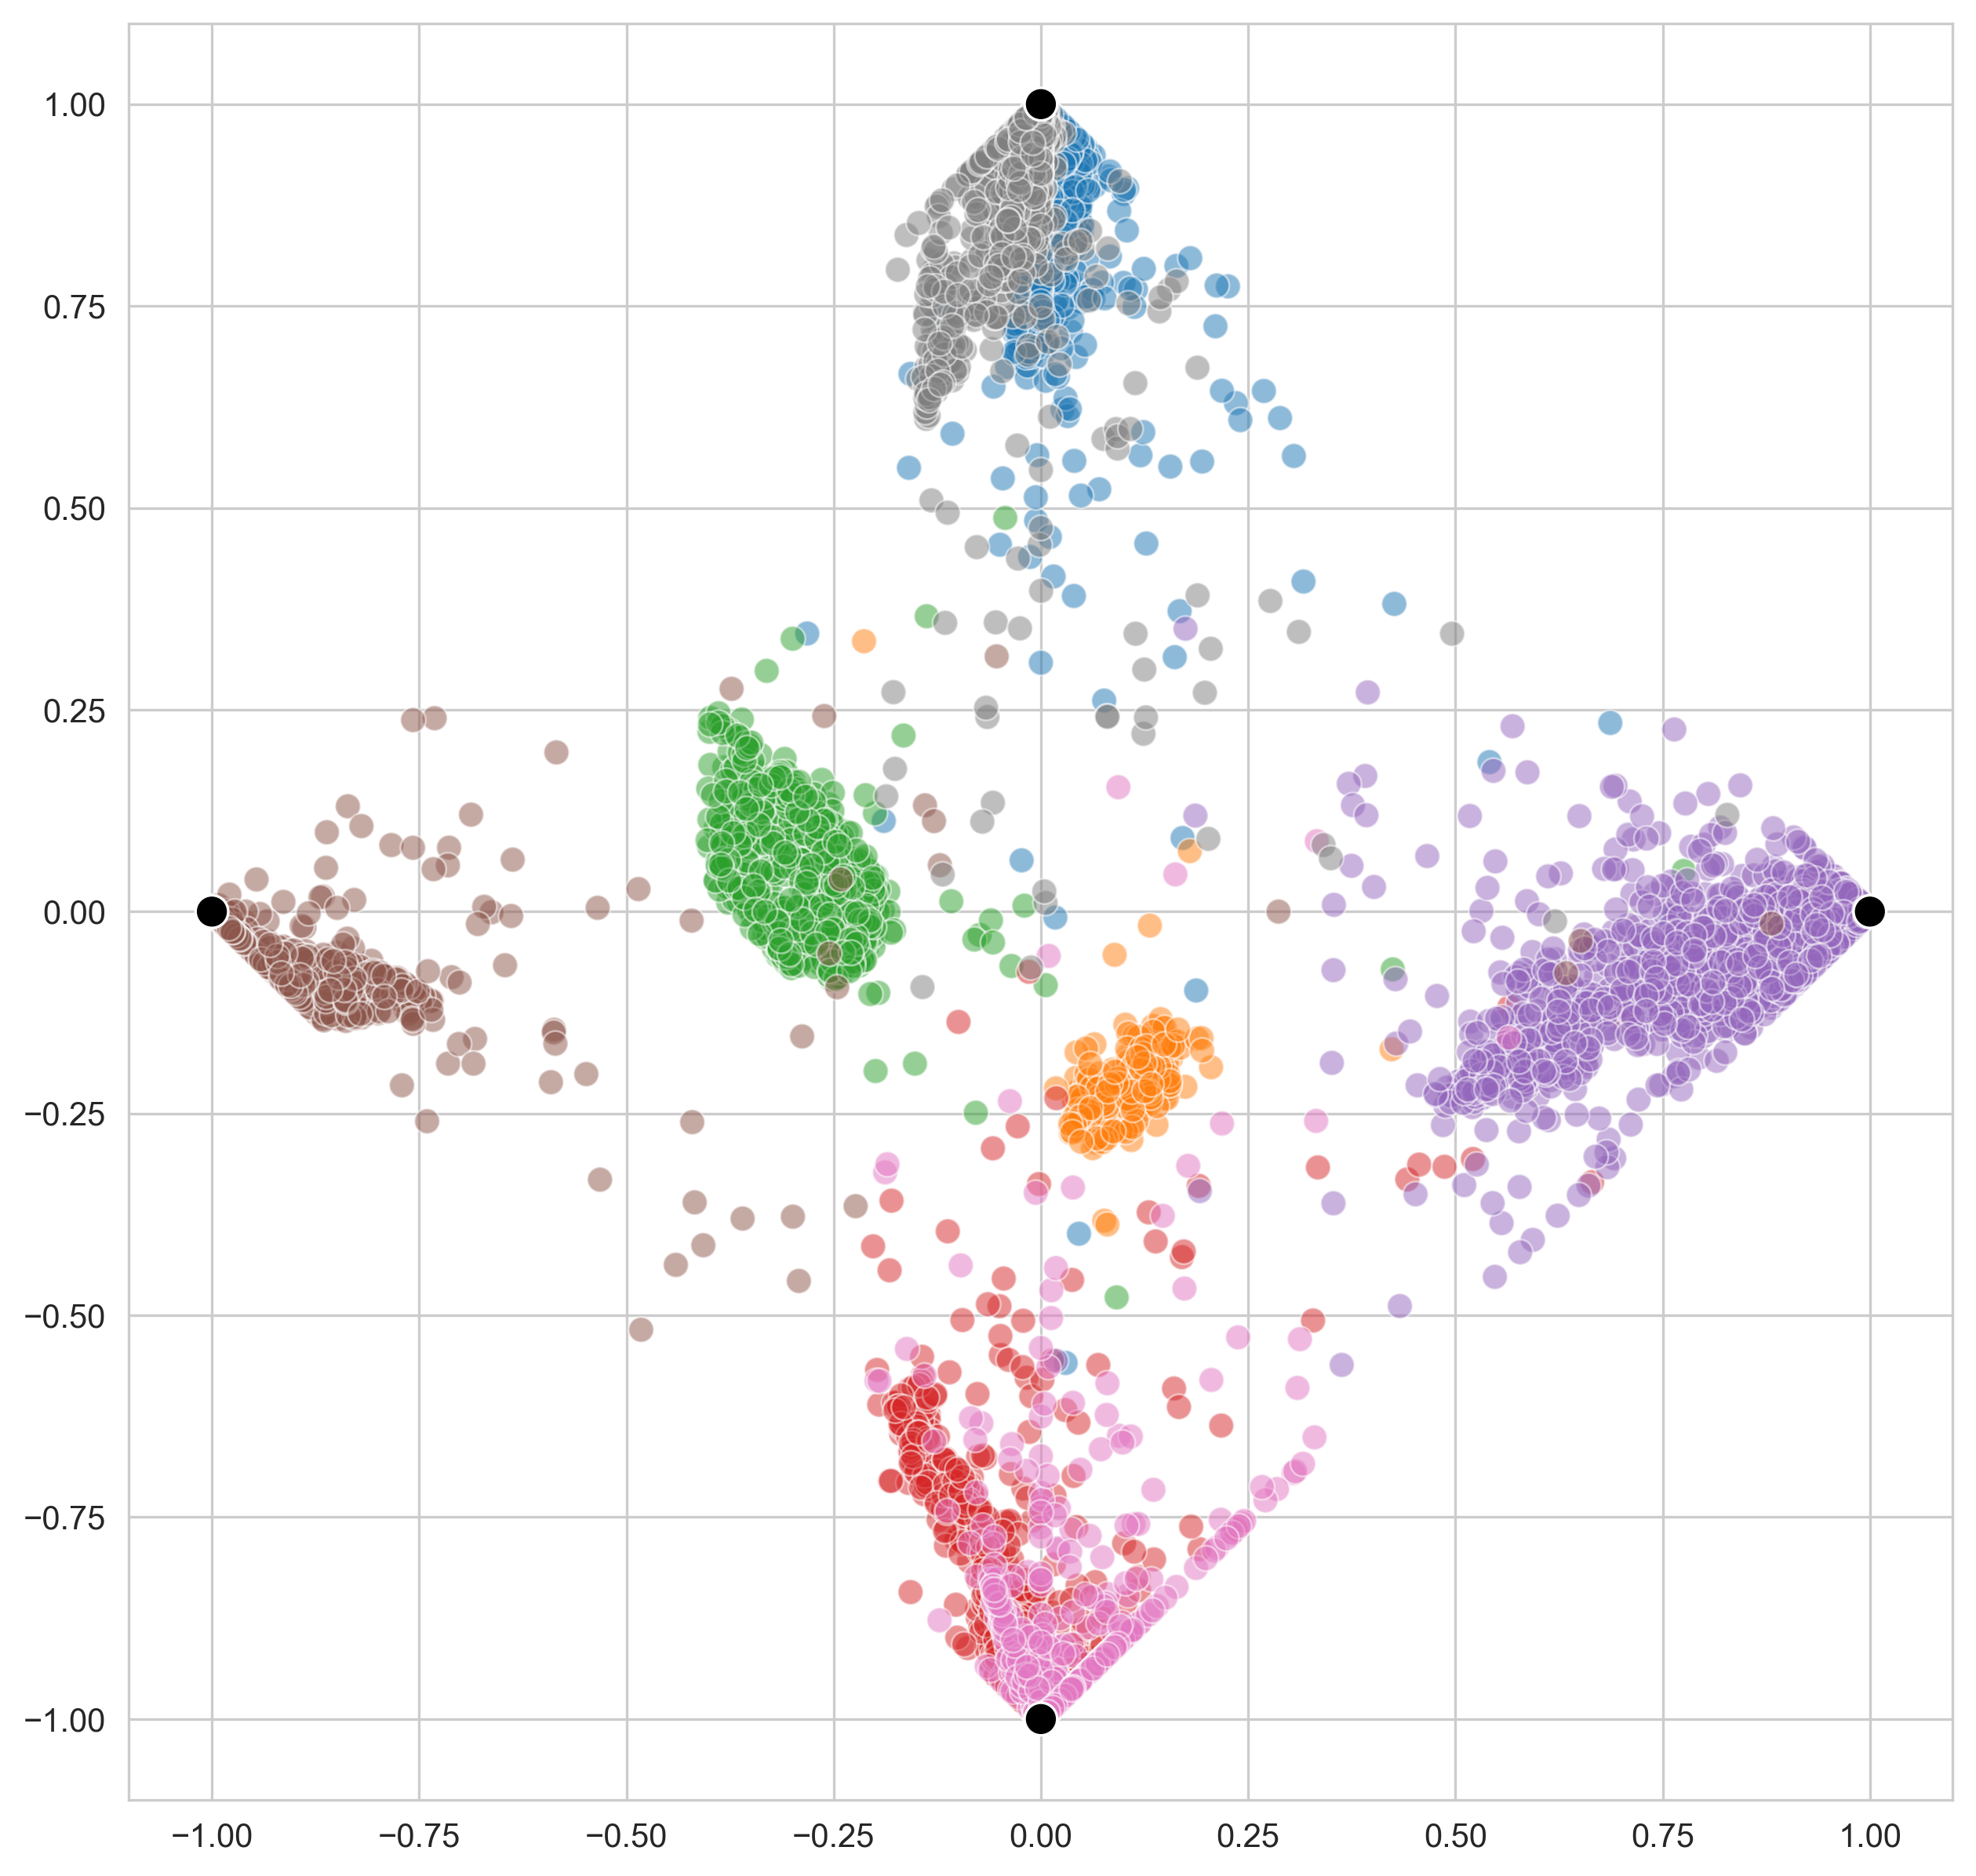

('V3', 'V4', 'V2', 'V1')

In [50]:
cap_plot(pd.DataFrame(X_magic.obsm['ParetoTI_S'], index = X_magic.obs_names),hue = X_magic.obs.cline,
         arc_hue_dict={('V'+str(i+1)):j for i,j in enumerate(['k','k','k','k','k'])}, save = 'cap_scatterplot_ParetoTI_S.png')

In [8]:
X_magic.obs['subtype_labeled'] =X_magic.obs.ParetoTI_specialists

X_magic.obs.subtype_labeled = [str(i) for i in X_magic.obs.subtype_labeled]

new = []
for i in X_magic.obs.subtype_labeled:
    if i == 'nan':
        new.append("Generalist")
    else:
        new.append(str(i))

X_magic.obs.subtype_labeled = new

In [12]:
X_magic.obsm['ParetoTI_S'].max(axis = 1)

CellID
2637-SM-1-GCCAAT_S1:AAAACCTCCCACTCCTCx-DMS454    0.967586
2637-SM-1-GCCAAT_S1:AAAACCTCCACGAAACGx-DMS454    0.903656
2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454    0.998229
2637-SM-1-GCCAAT_S1:AAAACCTCCTTTACCCTx-DMS454    0.968512
2637-SM-1-GCCAAT_S1:AAAAGCCTACACAAGGCx-DMS454    0.923632
                                                   ...   
2639-SM-2-CTTGTA_S2:TTTGTGTCGGCCCTTAx-DMS53      0.982566
2639-SM-2-CTTGTA_S2:TTTGTGTCCACAAGGCx-DMS53      0.971298
2639-SM-2-CTTGTA_S2:TTTGTGTCCTGTTCTTx-DMS53      1.000000
2639-SM-2-CTTGTA_S2:TTTGTGTCCCCATCTGx-DMS53      0.880777
2639-SM-2-CTTGTA_S2:TTTGTGTCCAGTTTGCx-DMS53      1.000000
Length: 13945, dtype: float64

('V3', 'V4', 'V2', 'V1')


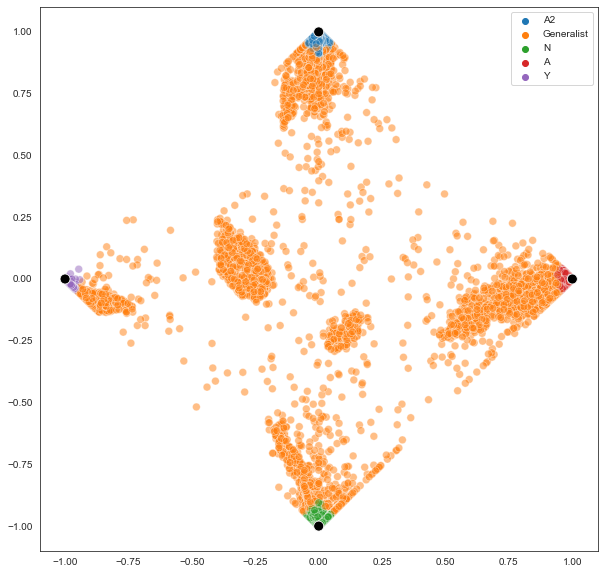

('V3', 'V4', 'V2', 'V1')

In [9]:
mb.pl.cap_plot(pd.DataFrame(X_magic.obsm['ParetoTI_S'], index = X_magic.obs_names),hue = X_magic.obs.subtype_labeled,
         arc_hue_dict={('V'+str(i+1)):j for i,j in enumerate(['k','k','k','k','k'])}, save = 'cap_scatterplot_ParetoTI_S_Vlabels.png')

In [104]:
indir = "../../../data/single-cell-rna-seq/Human-cell-lines/"

samples =["2637-1-DMS454","2637-2-CORL279","2637-3-H1048","2638-1-H82","2638-2-H69","2638-4-H841","2639-1-H524","2639-2-DMS53"]
[a1,a2,a3,a4,a5,a6,a7, a8] = [mb.pp.read_loom(sample, indir) for sample in samples]


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD113-1', 'SNORD113-2']
  + str(example_colliding_values)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Ex

In [105]:
adatas = [a1,a2,a3,a4,a5,a6,a7, a8] 
a1 = adatas.pop(0)
batch_categories = ["DMS454","CORL279","H1048","H82","H69","H841","H524","DMS53"]
batch_key = 'cline'
adata = a1.concatenate(adatas, batch_key=batch_key, batch_categories=batch_categories)